Xây dựng mô hình cây quyết định dự đoán bệnh  nào sẽ thuộc vào mùa nào.
gợi ý dựa vào Ngày vào viện xác định được mùa trong năm sau đó chuẩn hóa thành 4 mùa: Xuân, Hạ, Thu, Đông. (4 lớp)

In [1]:
# import thư viện cần thiết
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

In [2]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [4]:
# load data
data = pd.read_excel(r'D:\My_Jobs\Subjects\KPDL\data\SoLieuCPDieuTri2016.xlsx')
data.head()

,ID,NAMSINH,Unnamed: 2,DANTOC,TENPXA,TENQUANHUYEN,TENTINHTHANH,MAICD,CHANDOAN,NGAYVAO,NGAYRA,TONGCP,BHYT_TT,thờ gian điều trị,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,160101000007636000,1988,NaN,Kinh,Phường Nhơn Bình,Thành phố Qui Nhơn,Bình Định,S01.1;,Vết thương hở của mi mắt và vùng quanh mắt;,2016-01-01 00:55:00,2016-01-01 01:04:00,15000.0000,0.0000,0.0062,0,NaN,0.0000
1,160101000007640000,1998,NaN,Kinh,Phường Nhơn Phú,Thành phố Qui Nhơn,Bình Định,I20;,Cơn đau thắt ngực;,2016-01-01 01:37:00,2016-01-01 03:23:00,83346.5000,83346.5000,0.0736,0,NaN,NaN
2,160101000007640992,1980,NaN,Kinh,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,J68.2;P71.0;,Viêm hô hấp trên;Hạ calci máu;,2016-01-01 03:31:00,2016-01-01 05:00:00,159.9990,0.0000,0.0618,0,NaN,NaN
3,160104000001348000,2010,NaN,Kinh,Phường Trần Quang Diệu,Thành phố Qui Nhơn,Bình Định,A91.A;,Sốt xuất huyết Dengue;,2015-12-29 20:25:00,2016-01-01 07:00:00,112938.0000,112938.0000,2.4410,2,NaN,NaN
4,160105000001870016,2010,NaN,Kinh,Phường Nhơn Phú,Thành phố Qui Nhơn,Bình Định,A91;J00;,Sốt xuất huyết Dengue;Viêm Họng Cấp;,2015-12-25 08:44:00,2016-01-01 07:00:00,262395.0002,262395.0003,6.9278,7,NaN,NaN


# MÔ TẢ BỘ DỮ LIỆU

**1. ID:** Mã định danh duy nhất của từNG bệnh nhân.

**2. NAMSINH:** Năm sinh của bệnh nhân.

**3. DANTOC:** Dân tộc của bệnh nhân (ví dụ: Kinh, Mông, Jarai v.v.).

**4. TENPXA:** Tên phường/xã.

**5. TENQUANHUYEN:** Tên quận/huyện.

**6. TENTINHTHANH:** Tên tỉnh/thành phố.

**7. MAICD:** Mã ICD: Mã quốc tế phân loại bệnh.

**8. CHANDOAN:** Chẩn đoán bệnh.

**9. NGAYVAO:** Thời gian bệnh nhân vào viện.

**10. NGAYRA:** Thời gian bệnh nhân xuất viện.

**11. TONGCP:** Tổng chi phí điều trị.

**12. BHYT_TT:** Số tiền được bảo hiểm y tế thanh toán cho bệnh nhân.

**13. Thời gian điều trị:** Số ngày điều trị, tính chính xác theo thời gian (thập phân, ví dụ 0.00741 tương đương vài phút).

**14. Unnamed: 14:** Tổng số ngày điều trị (đã được làm tròn).

**15. Unnamed: 2:** 

**16. Unnamed: 15:**

**17. Unnamed: 16:**

# HIỂU DỮ LIỆU

In [5]:
df = data.copy()

In [6]:
print(f"Số dòng: {df.shape[0]} dòng")
print(f"Số cột: {df.shape[1]} cột")

Số dòng: 68762 dòng
Số cột: 17 cột


In [7]:
print(df.columns)

Index(['ID', 'NAMSINH', 'Unnamed: 2', 'DANTOC', 'TENPXA', 'TENQUANHUYEN',
       'TENTINHTHANH', 'MAICD', 'CHANDOAN', 'NGAYVAO', 'NGAYRA', 'TONGCP',
       'BHYT_TT', 'thờ gian điều trị', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')


In [9]:
df.nunique()    # kiểm tra số lượng giá trị duy nhất trong mỗi cột

ID                   67796
NAMSINH                107
Unnamed: 2               0
DANTOC                  27
TENPXA                1102
TENQUANHUYEN           343
TENTINHTHANH            56
MAICD                10309
CHANDOAN             26102
NGAYVAO              60314
NGAYRA               20824
TONGCP               60686
BHYT_TT              28642
thờ gian điều trị    29690
Unnamed: 14            135
Unnamed: 15              0
Unnamed: 16              1
dtype: int64

- data có tổng cộng 68762 dòng, thì cột ID phải có 68762 giá trị khác nhau vì ID mã định danh duy nhất của mỗi bệnh nhân. Nhưng kiểm tra số lượng giá trị khác biệt thì ta có thể thấy được cột ID chỉ có 67796 giá trị khác biệt, chắc chắn có sự lặp lại ID => cần xử lý.

In [57]:
# kiểm tra giá trị thiếu
df.isna().sum()

ID                       0
NAMSINH                  0
Unnamed: 2           68762
DANTOC                   0
TENPXA                   0
TENQUANHUYEN             0
TENTINHTHANH             0
MAICD                    0
CHANDOAN                 0
NGAYVAO                  0
NGAYRA                   0
TONGCP                   0
BHYT_TT                  0
thờ gian điều trị        0
Unnamed: 14              0
Unnamed: 15          68762
Unnamed: 16          68761
dtype: int64

- các cột: 'Unnamed: 2', 'Unnamed: 15', 'Unnamed: 16' không có giá trị => xóa tất cả cột này. 

In [8]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 15', 'Unnamed: 16'])

In [59]:
df.dtypes   # kiểm tra kiểu dữ liệu

ID                            int64
NAMSINH                       int64
DANTOC                       object
TENPXA                       object
TENQUANHUYEN                 object
TENTINHTHANH                 object
MAICD                        object
CHANDOAN                     object
NGAYVAO              datetime64[ns]
NGAYRA               datetime64[ns]
TONGCP                      float64
BHYT_TT                     float64
thờ gian điều trị           float64
Unnamed: 14                   int64
dtype: object

In [60]:
df.describe()   # thống kê mô tả bộ dữ liệu

,ID,NAMSINH,NGAYVAO,NGAYRA,TONGCP,BHYT_TT,thờ gian điều trị,Unnamed: 14
count,68762.0000,68762.0000,68762,68762,68762.0000,68762.0000,68762.0000,68762.0000
mean,160742437617021408.0000,1976.3386,2016-07-17 13:04:55.489659904,2016-07-25 01:03:18.162648064,4417028.4833,1808397.2223,7.4989,7.4402
min,151231000000155008.0000,1909.0000,2010-04-09 08:02:00,2016-01-01 01:04:00,1.7955,-353702.8110,-5.9688,-6.0000
25%,160522000015292000.0000,1955.0000,2016-05-12 14:15:30,2016-05-20 18:00:00,718131.9999,0.0000,2.2840,2.0000
50%,160809000014360512.0000,1979.0000,2016-08-02 06:02:30,2016-08-09 16:00:00,1844088.7497,0.0000,4.8576,5.0000
75%,161024000003389760.0000,1996.0000,2016-10-16 19:22:45,2016-10-24 11:15:00,4598382.2347,1242017.1364,8.2799,8.0000
max,170427000000700992.0000,2016.0000,2016-12-31 22:26:00,2016-12-31 23:47:00,163899935.9277,204226603.9085,2142.2903,2142.0000
std,364501748980282.3125,26.1366,NaN,NaN,8252480.0712,5871595.8908,17.4857,17.4830


- Nhìn vào bảng thóng kê mô tả ta có thể thấy được cột 'thờ gian điều trị' và cột 'Unnamed: 14' là cột làm tròn thời gian điều trị bệnh. Ví dụ: 2.121 = 2.
Thời gian điều trị bệnh có giá trị âm là vô lý => cần xử lý giá trị âm.

- Tương tự nhìn vào thống kê mô tả ta có thể thấy được cột: 'BHYT_TT' , cột này là cột Tiền mà bảo hiểm Y Tế chi trả nên cũng không được có giá trị âm => cần xử lý.

- cột 'BHYT_TT', có 50% gía trị là 0 và có 50 giá trị lớn hơn 0 ( ta có thể cân nhắc rời rạc hóa các giá trị ở cột này thành yes/no)
 
- cột 'Unnamed: 14' có 75% giá trị bé hơn 8, nhưng max = 2142, có lẻ đây là outlier cần cân nhắc xử lí

- 

In [61]:
# đếm số lượng giá trị âm của cột 'BHYT_TT'
df[df['BHYT_TT'] < 0].shape[0]

1

In [62]:
# đếm số lượng giá trị âm của cột 'Unnamed: 14'
df[df['Unnamed: 14'] < 0].shape[0]

2

In [63]:
# chọn các trường có kiểu dữ liệu là int64 và float64 để vẽ biểu đồ tương quan
df_numeric = df.select_dtypes(include = ['int64', 'float64'])

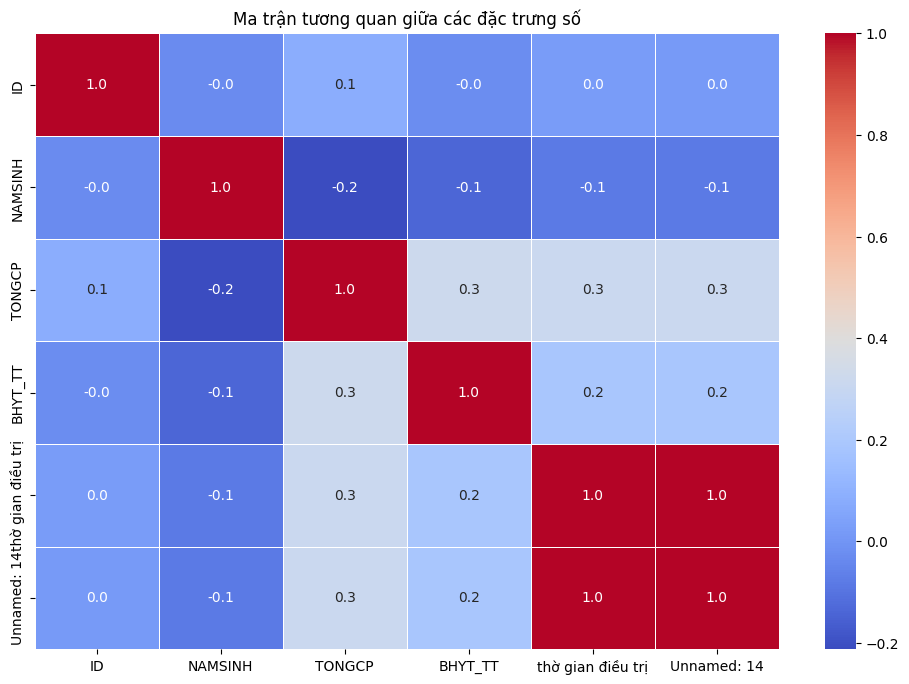

In [64]:
# vẽ biểu đồ tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title("Ma trận tương quan giữa các đặc trưng số")
plt.show()

- Nhìn vào biểu đồ tương quan này ta thấy 2 cột: 'thờ gian điều trị' và 'Unnamed: 14' tương quan tuyệt đối = 1 
=> giữ lại cột 'Unamed: 14' và xóa cột 'thờ gian điều trị'

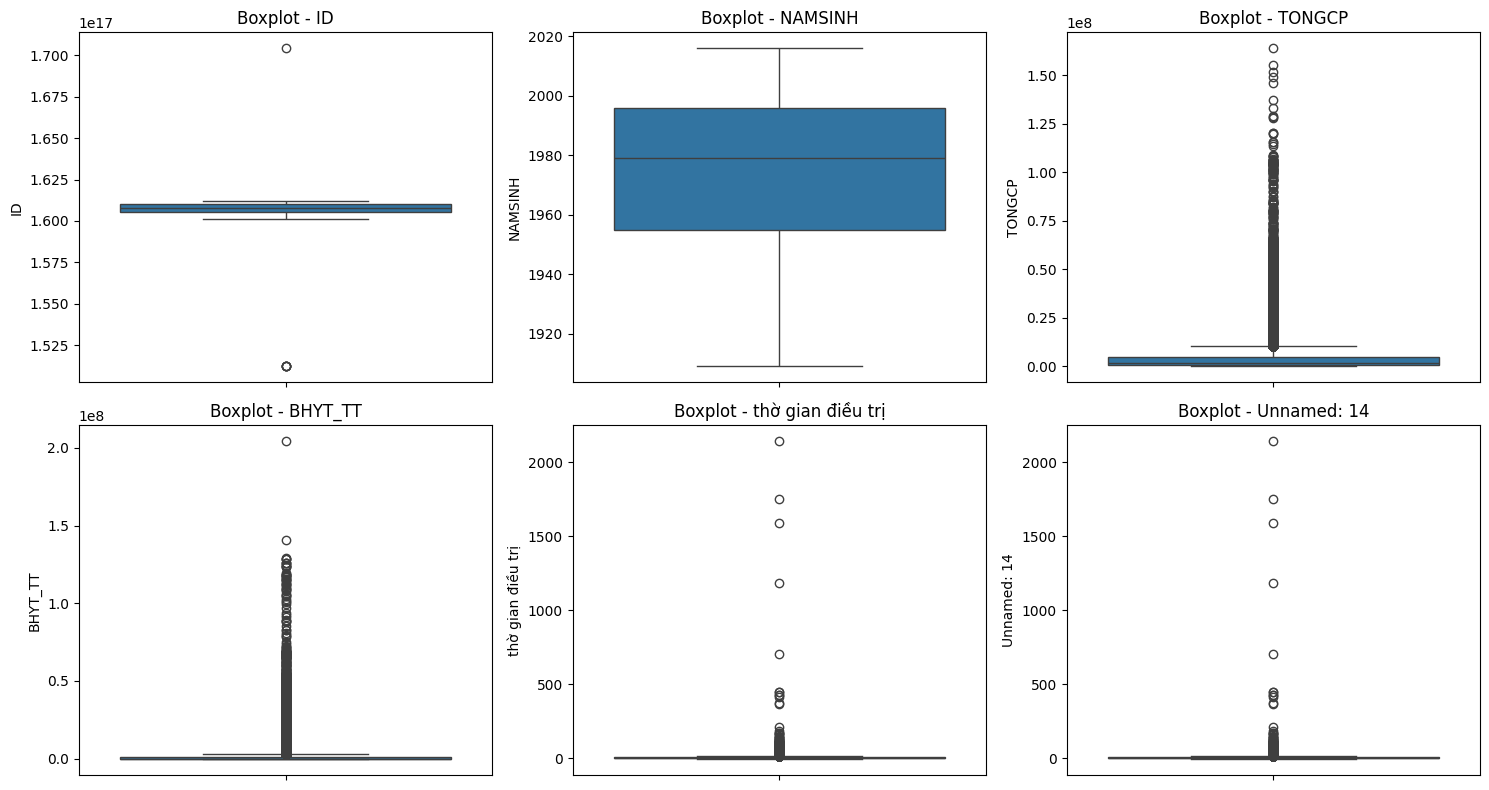

In [65]:
# kiểm tra outlier
n_cols_total = len(df_numeric.columns)
cols_per_fig = 15

for start in range(0, n_cols_total, cols_per_fig):
    end = min(start + cols_per_fig, n_cols_total)
    subset_cols = df_numeric.columns[start:end]
    n_cols = len(subset_cols)
    n_rows = math.ceil(n_cols / 3)

    plt.figure(figsize=(15, 4 * n_rows))
    
    for i, col in enumerate(subset_cols):
        plt.subplot(n_rows, 3, i + 1)
        sns.boxplot(data=df_numeric, y=col)
        plt.title(f'Boxplot - {col}')
    
    plt.tight_layout()
    plt.show()

Cần xử lí outlier cho các cột: 'TONGCP', 'BHYT_TT', 'Unnamed: 14'

In [66]:
time_treatment = df[df['Unnamed: 14'] > 30]
time_treatment.shape[0]

2105

In [67]:
# Tìm các ID bị lặp lại (xuất hiện > 1 lần)
duplicate_counts = df['ID'].value_counts()
duplicate_counts = duplicate_counts[duplicate_counts > 1]

# Hiển thị số dòng trùng lặp
print(f"Số ID trùng lặp: {len(duplicate_counts)}")

# Hiển thị số lần mỗi ID trùng lặp (xuất hiện bao nhiêu lần)
print("Các ID bị lặp và số lần lặp lại:")
display(duplicate_counts)

Số ID trùng lặp: 956
Các ID bị lặp và số lần lặp lại:


ID
161007000000439008    3
161007000000440000    3
161007000000440992    3
161111000000744000    3
161118000000752000    3
                     ..
160606000000683008    2
161230000000864992    2
161230000000865984    2
161230000000867008    2
160104000003876992    2
Name: count, Length: 956, dtype: int64

- cần loại bỏ các dòng có giá trị trùng lặp này.

In [68]:
# kiểm tra các giá trị duy nhất trong các cột: 'NAMSINH', 'DANTOC', 'TENPXA', 'TENQUANHUYEN', 'TENTINHTHANH'
print('Giá trị duy nhất trong cột NAMSINH:')
print(df['NAMSINH'].unique())

print('Giá trị duy nhất trong cột DANTOC:')
print(df['DANTOC'].unique())

print('Giá trị duy nhất trong cột TENPXA:')
print(df['TENPXA'].unique())

print('Giá trị duy nhất trong cột TENQUANHUYEN:')
print(df['TENQUANHUYEN'].unique())

print('Giá trị duy nhất trong cột TENTINHTHANH:')
print(df['TENTINHTHANH'].unique())

Giá trị duy nhất trong cột NAMSINH:
[1988 1998 1980 2010 1951 2011 2002 1936 2014 1991 1970 1989 1917 1934
 1984 1948 1962 1987 2012 2001 1942 2015 2000 1955 1999 1954 2006 2008
 1969 1997 1983 2013 1956 1961 1935 1975 1967 1974 2007 2005 2004 2009
 1992 1957 1946 1965 1986 1978 1953 1933 1932 1950 1976 1941 1996 1982
 1943 1968 1938 1930 1977 1928 1994 1979 1993 1963 1958 1959 1995 1990
 1985 1929 1949 1945 1964 1971 1940 1947 1925 1927 1952 1972 2003 1937
 1981 1966 1960 1944 1923 1973 1931 1924 1922 1921 1939 1920 2016 1926
 1919 1912 1918 1915 1916 1909 1910 1914 1911]
Giá trị duy nhất trong cột DANTOC:
['Kinh' 'Ba na' 'Chăm' 'Lào' 'Ê đê' 'M nông' 'La hù' 'Nước ngoài' 'Lô lô'
 'H rê' 'Gia rai' 'La ha' 'La chí' 'Nùng' 'X tiêng' 'Lự' 'Tày' 'Hà nhì'
 'Thổ' 'H mông' 'Mường' 'Chứt' 'K tu' 'Thái' 'Xơ đăng' 'Hoa' 'Dao']
Giá trị duy nhất trong cột TENPXA:
['Phường Nhơn Bình' 'Phường Nhơn Phú' 'Xã Nhơn Lộc' ... 'Xã Thanh Trì'
 'Xã Lộc Thủy' 'Phường Vĩnh Thanh']
Giá trị duy nhất trong cột TE

Xử lý giá trị: 'Không xác định' cho các cột: 'TENXA', 'TENQUANHUYEN', 'TENTINHTHANH'

**nhận xét:**
- Loại bỏ các cột không có giá trị phân tích: 'Unamed 2', 'Unamed 15', 'Unamed 16',
- Dữ liệu chưa có biến mục tiêu "Mùa" cần phải tạo đặc trưng mới.
- cần loại bỏ cột 'thờ gian điều trị' vì nó tương quan tuyệt đối với cột 'Unamed 14'
- Xử lí outlier cho các cột: 'TONGCP', 'BHYT_TT', 'Unnamed: 14'
- Xử lý giá trị: 'Không xác định' cho các cột: 'TENXA', 'TENQUANHUYEN', 'TENTINHTHANH'

# TIỀN XỬ LÍ DỮ LIỆU

In [9]:
# đổi tên cột 'Unnamed: 14' thành 'Streatment_time'
df.rename(columns = {'Unnamed: 14': 'treatment_time'}, inplace = True)

In [10]:
# Giữ lại dòng đầu tiên của mỗi ID, loại bỏ phần trùng
df = df.drop_duplicates(subset='ID', keep='first')

print(f"Số dòng sau khi xóa trùng lặp: {len(df)}")

Số dòng sau khi xóa trùng lặp: 67796


In [11]:
# xóa cột 'thờ gian điều trị', 'ID' vì nó không ảnh hưởng tới việc phân tích
df.drop(columns = ['thờ gian điều trị' , 'ID'], inplace = True)

In [12]:
df.columns  # kiểm tra lại các cột dữ liệu

Index(['NAMSINH', 'DANTOC', 'TENPXA', 'TENQUANHUYEN', 'TENTINHTHANH', 'MAICD',
       'CHANDOAN', 'NGAYVAO', 'NGAYRA', 'TONGCP', 'BHYT_TT', 'treatment_time'],
      dtype='object')

xử lý các giá trị âm trong cột 'BHYT_TT' và 'treatment_time'

In [13]:
df = df[(df['BHYT_TT'] >= 0) & (df['treatment_time'] >= 0)]

print(f"Số lượng giá trị âm trong cột 'BHYT_TT': {df[df['BHYT_TT'] < 0].shape[0]}")
print(f"Số lượng giá trị âm trong cột 'Streatment_time': {df[df['treatment_time'] < 0].shape[0]}")

Số lượng giá trị âm trong cột 'BHYT_TT': 0
Số lượng giá trị âm trong cột 'Streatment_time': 0


xử lí outlier cho các cột: 'TONGCP', 'BHYT_TT', 'treatment_time'

In [14]:
cols = ['TONGCP', 'BHYT_TT', 'treatment_time']

total_rows = df.shape[0]

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    n_outliers = outliers.shape[0]
    percent = (n_outliers / total_rows) * 100

    print(f"{col}:")
    print(f"Số lượng outlier: {n_outliers} dòng")
    print(f"Tỷ lệ: {percent:.2f}%\n")

TONGCP:
Số lượng outlier: 6307 dòng
Tỷ lệ: 9.30%

BHYT_TT:
Số lượng outlier: 9106 dòng
Tỷ lệ: 13.43%

treatment_time:
Số lượng outlier: 4881 dòng
Tỷ lệ: 7.20%



In [15]:
# Xử lí outlier

# Xác định outlier bằng IQR
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: Số lượng outlier = {outliers.shape[0]}")

# Capping (ghim giá trị về ngưỡng)
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)

TONGCP: Số lượng outlier = 6307
BHYT_TT: Số lượng outlier = 9106
treatment_time: Số lượng outlier = 4881


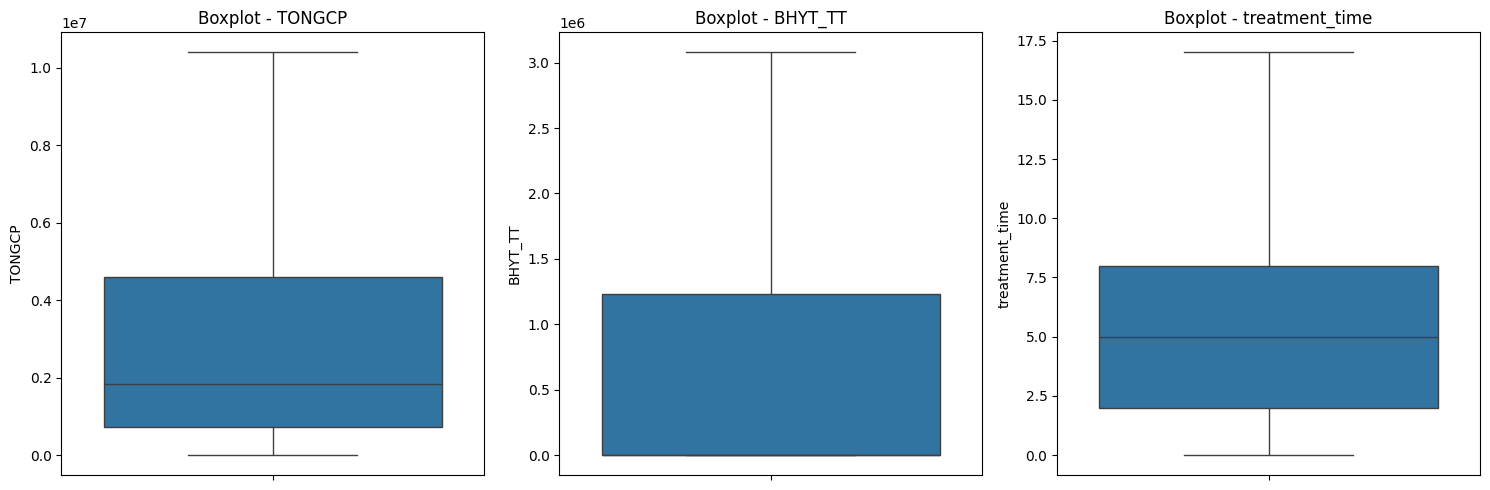

In [16]:
# kiểm tra lại sau khi xử lý outlier

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

Xử lí các giá trị 'không xác định'

In [17]:
# xử lý các giá trị "Không xác định"
unknow_cols = ['TENPXA', 'TENQUANHUYEN', 'TENTINHTHANH']
for col in unknow_cols:
    print(f"{col}: số dòng 'Không xác định' trước xử lý = {(df[col] == 'Không xác định').sum()}")

TENPXA: số dòng 'Không xác định' trước xử lý = 768
TENQUANHUYEN: số dòng 'Không xác định' trước xử lý = 682
TENTINHTHANH: số dòng 'Không xác định' trước xử lý = 14


In [18]:
# Lọc bỏ các dòng chứa "Không xác định" trong bất kỳ cột nào thuộc danh sách
for col in unknow_cols:
    df = df[df[col] != 'Không xác định']

# kiểm tra lại
for col in unknow_cols:
    print(f"{col}: số dòng 'Không xác định' sau xử lý = {(df[col] == 'Không xác định').sum()}")

TENPXA: số dòng 'Không xác định' sau xử lý = 0
TENQUANHUYEN: số dòng 'Không xác định' sau xử lý = 0
TENTINHTHANH: số dòng 'Không xác định' sau xử lý = 0


In [19]:
df_clean = df.copy()

In [20]:
df_clean.head()

,NAMSINH,DANTOC,TENPXA,TENQUANHUYEN,TENTINHTHANH,MAICD,CHANDOAN,NGAYVAO,NGAYRA,TONGCP,BHYT_TT,treatment_time
0,1988,Kinh,Phường Nhơn Bình,Thành phố Qui Nhơn,Bình Định,S01.1;,Vết thương hở của mi mắt và vùng quanh mắt;,2016-01-01 00:55:00,2016-01-01 01:04:00,15000.0000,0.0000,0
1,1998,Kinh,Phường Nhơn Phú,Thành phố Qui Nhơn,Bình Định,I20;,Cơn đau thắt ngực;,2016-01-01 01:37:00,2016-01-01 03:23:00,83346.5000,83346.5000,0
2,1980,Kinh,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,J68.2;P71.0;,Viêm hô hấp trên;Hạ calci máu;,2016-01-01 03:31:00,2016-01-01 05:00:00,159.9990,0.0000,0
3,2010,Kinh,Phường Trần Quang Diệu,Thành phố Qui Nhơn,Bình Định,A91.A;,Sốt xuất huyết Dengue;,2015-12-29 20:25:00,2016-01-01 07:00:00,112938.0000,112938.0000,2
4,2010,Kinh,Phường Nhơn Phú,Thành phố Qui Nhơn,Bình Định,A91;J00;,Sốt xuất huyết Dengue;Viêm Họng Cấp;,2015-12-25 08:44:00,2016-01-01 07:00:00,262395.0002,262395.0003,7


xử lý cột 'MAICD

In [21]:
# xử lý cột 'MAICD
df["MAICD"] = df["MAICD"].str.rstrip(";").str.split(";")
df = df.explode("MAICD")
df = df.reset_index(drop=True)

In [22]:
# xử lý cột 'CHANDOAN'
df["CHANDOAN"] = df["CHANDOAN"].str.rstrip(";").str.split(";")
df = df.explode("CHANDOAN")
df = df.reset_index(drop=True)

In [23]:
df.head()

,NAMSINH,DANTOC,TENPXA,TENQUANHUYEN,TENTINHTHANH,MAICD,CHANDOAN,NGAYVAO,NGAYRA,TONGCP,BHYT_TT,treatment_time
0,1988,Kinh,Phường Nhơn Bình,Thành phố Qui Nhơn,Bình Định,S01.1,Vết thương hở của mi mắt và vùng quanh mắt,2016-01-01 00:55:00,2016-01-01 01:04:00,15000.0000,0.0000,0
1,1998,Kinh,Phường Nhơn Phú,Thành phố Qui Nhơn,Bình Định,I20,Cơn đau thắt ngực,2016-01-01 01:37:00,2016-01-01 03:23:00,83346.5000,83346.5000,0
2,1980,Kinh,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,J68.2,Viêm hô hấp trên,2016-01-01 03:31:00,2016-01-01 05:00:00,159.9990,0.0000,0
3,1980,Kinh,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,J68.2,Hạ calci máu,2016-01-01 03:31:00,2016-01-01 05:00:00,159.9990,0.0000,0
4,1980,Kinh,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,P71.0,Viêm hô hấp trên,2016-01-01 03:31:00,2016-01-01 05:00:00,159.9990,0.0000,0


In [24]:
# tạo cột 'AGE' từ cột 'NAMSINH'
df['AGE'] = 2016 - df['NAMSINH']

tạo đặc trưng mới month-year từ cột 'NGAYVAO'

In [25]:
# tạo đặc trưng mới month-year từ cột 'NGAYVAO'
df['month-year'] = pd.to_datetime(df['NGAYVAO']).dt.strftime('%Y-%m')
df['NGAYVAO'] = pd.to_datetime(df['NGAYVAO']).dt.date
df['NGAYRA'] = pd.to_datetime(df['NGAYRA']).dt.date

**Các mùa ở việt Nam:**<br> 

Mùa Xuân: tháng 2, 3, 4<br>

Mùa Hè: tháng 5, 6, 7<br>

Mùa Thu: 8, 9, 10<br>

Mùa Đông: tháng 11, 12, 1<br>

Hàm này dùng để thêm cột "Mùa" vào DataFrame df dựa trên tháng trong cột NGAYVAO.

In [26]:
def get_season(month):
    if month in [2, 3, 4]:
        return 'Xuan'
    elif month in [5, 6, 7]:
        return 'Ha'
    elif month in [8, 9, 10]:
        return 'Thu'
    else: 
        return 'Dong'

def by_season(row):
    month = row['NGAYVAO'].month
    return get_season(month)
 
df['season'] = df.apply(by_season, axis=1)
df.head()

,NAMSINH,DANTOC,TENPXA,TENQUANHUYEN,TENTINHTHANH,MAICD,CHANDOAN,NGAYVAO,NGAYRA,TONGCP,BHYT_TT,treatment_time,AGE,month-year,season
0,1988,Kinh,Phường Nhơn Bình,Thành phố Qui Nhơn,Bình Định,S01.1,Vết thương hở của mi mắt và vùng quanh mắt,2016-01-01,2016-01-01,15000.0000,0.0000,0,28,2016-01,Dong
1,1998,Kinh,Phường Nhơn Phú,Thành phố Qui Nhơn,Bình Định,I20,Cơn đau thắt ngực,2016-01-01,2016-01-01,83346.5000,83346.5000,0,18,2016-01,Dong
2,1980,Kinh,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,J68.2,Viêm hô hấp trên,2016-01-01,2016-01-01,159.9990,0.0000,0,36,2016-01,Dong
3,1980,Kinh,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,J68.2,Hạ calci máu,2016-01-01,2016-01-01,159.9990,0.0000,0,36,2016-01,Dong
4,1980,Kinh,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,P71.0,Viêm hô hấp trên,2016-01-01,2016-01-01,159.9990,0.0000,0,36,2016-01,Dong


In [27]:
# kiểm tra giá trị trong cột 'Mùa'
print(df['season'].unique())

['Dong' 'Thu' 'Xuan' 'Ha']


Với Decision Tree, nên dùng One-Hot Encoding thay vì label encoding để tránh mô hình hiểu nhầm là có thứ tự giữa các mùa.

Xử lý cột 'DANTOC'

In [28]:
# vì cột 'DANTOC' có giá trị 'Kinh' tức dân tộc kinh chiếm hơn 99% data nên ta có thể chuẩn hóa lại như sau. Kinh = Kinh, không phải kinh: other
df['DANTOC'] = df['DANTOC'].apply(lambda z: 'Kinh' if z == 'Kinh' else 'other')

df['DANTOC'] = (df['DANTOC'] == 'Kinh').astype(int)

In [29]:
df.head()   # kiểm tra lại các cột dữ liệu

,NAMSINH,DANTOC,TENPXA,TENQUANHUYEN,TENTINHTHANH,MAICD,CHANDOAN,NGAYVAO,NGAYRA,TONGCP,BHYT_TT,treatment_time,AGE,month-year,season
0,1988,1,Phường Nhơn Bình,Thành phố Qui Nhơn,Bình Định,S01.1,Vết thương hở của mi mắt và vùng quanh mắt,2016-01-01,2016-01-01,15000.0000,0.0000,0,28,2016-01,Dong
1,1998,1,Phường Nhơn Phú,Thành phố Qui Nhơn,Bình Định,I20,Cơn đau thắt ngực,2016-01-01,2016-01-01,83346.5000,83346.5000,0,18,2016-01,Dong
2,1980,1,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,J68.2,Viêm hô hấp trên,2016-01-01,2016-01-01,159.9990,0.0000,0,36,2016-01,Dong
3,1980,1,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,J68.2,Hạ calci máu,2016-01-01,2016-01-01,159.9990,0.0000,0,36,2016-01,Dong
4,1980,1,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,P71.0,Viêm hô hấp trên,2016-01-01,2016-01-01,159.9990,0.0000,0,36,2016-01,Dong


In [30]:
df.nunique()

NAMSINH             107
DANTOC                2
TENPXA             1092
TENQUANHUYEN        335
TENTINHTHANH         54
MAICD              2381
CHANDOAN          21147
NGAYVAO             421
NGAYRA              358
TONGCP            52899
BHYT_TT           19097
treatment_time       18
AGE                 107
month-year           24
season                4
dtype: int64

In [31]:
labels_count = df['season'].value_counts()
labels_count

season
Dong    49193
Thu     49090
Ha      41453
Xuan    17624
Name: count, dtype: int64

In [32]:
y = df['season']   # biến mục tiêu

# sau khi tạo được biến mục tiêu, ta sẽ xóa các cột không cần thiết
x = df.drop(columns = ['season', 'NGAYVAO', 'NGAYRA', 'month-year', 'NAMSINH'])   # biến độc lập

In [33]:
x.head()

,DANTOC,TENPXA,TENQUANHUYEN,TENTINHTHANH,MAICD,CHANDOAN,TONGCP,BHYT_TT,treatment_time,AGE
0,1,Phường Nhơn Bình,Thành phố Qui Nhơn,Bình Định,S01.1,Vết thương hở của mi mắt và vùng quanh mắt,15000.0000,0.0000,0,28
1,1,Phường Nhơn Phú,Thành phố Qui Nhơn,Bình Định,I20,Cơn đau thắt ngực,83346.5000,83346.5000,0,18
2,1,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,J68.2,Viêm hô hấp trên,159.9990,0.0000,0,36
3,1,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,J68.2,Hạ calci máu,159.9990,0.0000,0,36
4,1,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,P71.0,Viêm hô hấp trên,159.9990,0.0000,0,36


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# Khởi tạo LabelEncoder cho biến mục tiêu
le_target = LabelEncoder()

# Fit trên y_train và transform
y_train_encoded = le_target.fit_transform(y_train)

# Transform y_test theo encoder đã fit từ y_train
y_test_encoded = le_target.transform(y_test)

In [37]:
# In toàn bộ ánh xạ: giá trị gốc -> mã hóa
label_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))

print("Ánh xạ giá trị gốc -> mã hóa:")
for original, encoded in label_mapping.items():
    print(f"{encoded} - {original}")

Ánh xạ giá trị gốc -> mã hóa:
0 - Dong
1 - Ha
2 - Thu
3 - Xuan


In [38]:
# Các cột dạng chuỗi cần mã hóa
categorical_cols = ['TENPXA', 'TENQUANHUYEN', 'TENTINHTHANH', 'MAICD', 'CHANDOAN']
le_dict = {}

for col in categorical_cols:
    le = LabelEncoder()
    
    # Fit trên X_train
    le.fit(X_train[col].astype(str))
    
    # Transform cả train và test (ép kiểu str phòng trường hợp có giá trị không phải chuỗi)
    X_train[col] = le.transform(X_train[col].astype(str))
    
    # Với X_test, có thể có giá trị chưa gặp ở train, xử lý bằng map với dict để tránh lỗi
    # Chuyển các giá trị chưa thấy thành một mã mới (ví dụ -1)
    X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
    
    # Lưu encoder
    le_dict[col] = le

In [39]:
# kiểm tra dữ liệu sau khi mã hóa
X_train[categorical_cols].head()

,TENPXA,TENQUANHUYEN,TENTINHTHANH,MAICD,CHANDOAN
78968,113,275,5,1709,18734
9812,188,275,5,1055,12671
133794,128,275,5,1877,10574
95678,100,275,5,2039,3248
49504,186,275,5,904,13220


In [40]:
# Kiểm tra số lượng giá trị mã hóa trong từng cột

for col in categorical_cols:
    n_classes = len(le_dict[col].classes_)
    print(f"{col}: {n_classes} giá trị được mã hóa")

TENPXA: 1009 giá trị được mã hóa
TENQUANHUYEN: 304 giá trị được mã hóa
TENTINHTHANH: 52 giá trị được mã hóa
MAICD: 2263 giá trị được mã hóa
CHANDOAN: 19013 giá trị được mã hóa


In [41]:
le_target = LabelEncoder()
le_target.fit(y_train)

unique, counts = np.unique(y_train_encoded, return_counts=True)

for label, count in zip(unique, counts):
    print(f"{label} ({le_target.classes_[label]}): {count}")

0 (Dong): 39355
1 (Ha): 33162
2 (Thu): 39272
3 (Xuan): 14099


In [ ]:
#Sau này khi dự đoán xong, có thể chuyển kết quả ngược lại thành tên mùa bằng:
#le_target.inverse_transform(y_pred)

**Nhận xét:**


# PHÂN TÍCH DỮ LIỆU(TRỰC QUAN HÓA DỮ LIỆU)

In [107]:
df_clean.head()

,NAMSINH,DANTOC,TENPXA,TENQUANHUYEN,TENTINHTHANH,MAICD,CHANDOAN,NGAYVAO,NGAYRA,TONGCP,BHYT_TT,treatment_time
0,1988,Kinh,Phường Nhơn Bình,Thành phố Qui Nhơn,Bình Định,S01.1;,Vết thương hở của mi mắt và vùng quanh mắt;,2016-01-01 00:55:00,2016-01-01 01:04:00,15000.0000,0.0000,0
1,1998,Kinh,Phường Nhơn Phú,Thành phố Qui Nhơn,Bình Định,I20;,Cơn đau thắt ngực;,2016-01-01 01:37:00,2016-01-01 03:23:00,83346.5000,83346.5000,0
2,1980,Kinh,Xã Nhơn Lộc,Thị xã An Nhơn,Bình Định,J68.2;P71.0;,Viêm hô hấp trên;Hạ calci máu;,2016-01-01 03:31:00,2016-01-01 05:00:00,159.9990,0.0000,0
3,2010,Kinh,Phường Trần Quang Diệu,Thành phố Qui Nhơn,Bình Định,A91.A;,Sốt xuất huyết Dengue;,2015-12-29 20:25:00,2016-01-01 07:00:00,112938.0000,112938.0000,2
4,2010,Kinh,Phường Nhơn Phú,Thành phố Qui Nhơn,Bình Định,A91;J00;,Sốt xuất huyết Dengue;Viêm Họng Cấp;,2015-12-25 08:44:00,2016-01-01 07:00:00,262395.0002,262395.0003,7


In [108]:
namsinh = df_clean['NAMSINH'].value_counts().reset_index(name = 'SO_LUONG')
namsinh = namsinh.sort_values(by='SO_LUONG', ascending=False).reset_index(drop=True)
print(namsinh.head())
print(namsinh.tail())

   NAMSINH  SO_LUONG
0     2015      2640
1     2016      2615
2     2014      1669
3     1990      1460
4     1991      1452
     NAMSINH  SO_LUONG
102     1914         4
103     1910         3
104     1912         2
105     1909         1
106     1911         1


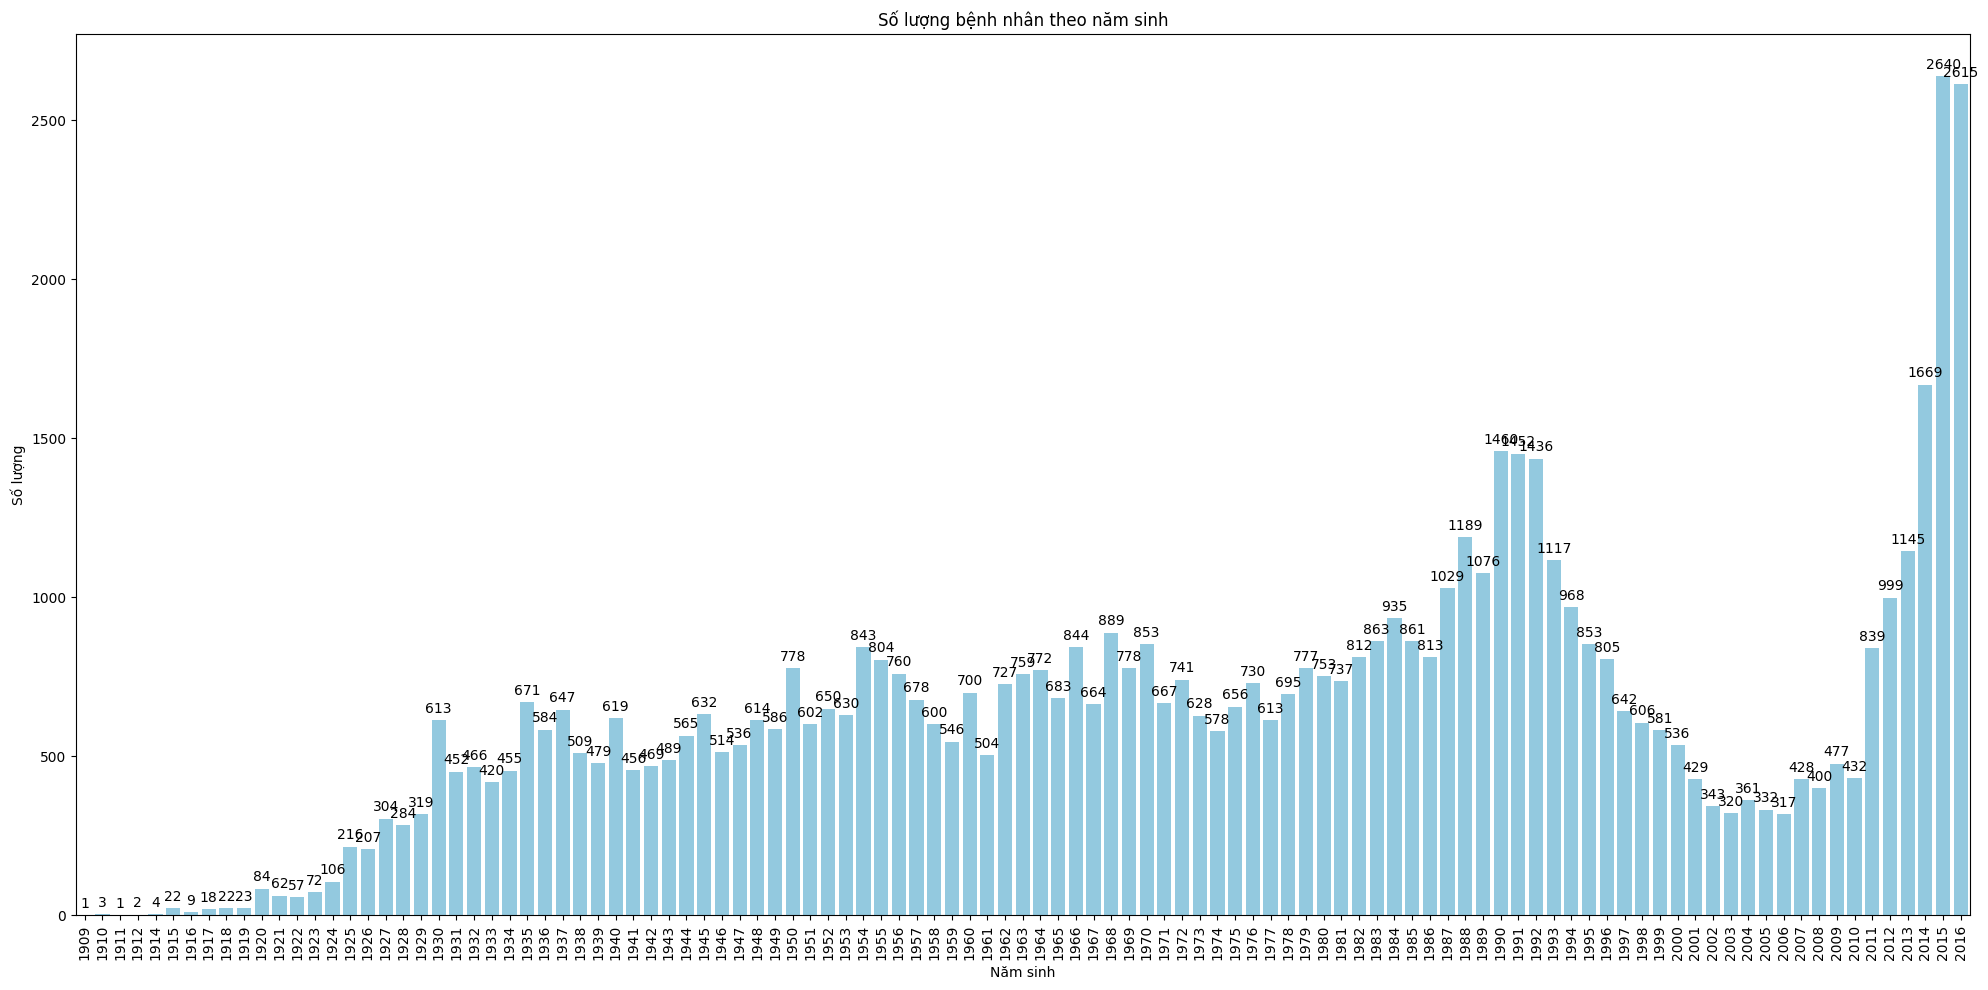

In [109]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=namsinh, x='NAMSINH', y='SO_LUONG', color='skyblue')

plt.title('Số lượng bệnh nhân theo năm sinh')
plt.xlabel('Năm sinh')
plt.ylabel('Số lượng')
plt.xticks(rotation=90)  # Xoay nhãn trục x cho dễ nhìn

# Hiển thị giá trị trên đỉnh mỗi cột
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

In [110]:
df_clean['AGE'] = 2016 - df['NAMSINH']

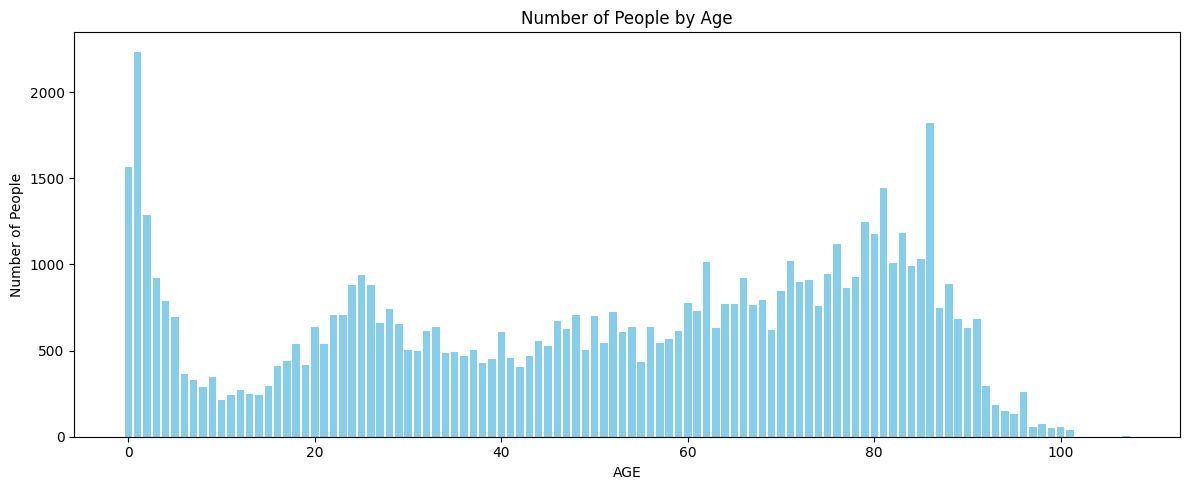

In [111]:
# Tầng suất của từng độ tuổi
age_counts = df_clean['AGE'].value_counts().sort_index()  # Sắp xếp theo tuổi tăng dần

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.xlabel('AGE')
plt.ylabel('Number of People')
plt.title('Number of People by Age')
plt.xticks(rotation=0)  # Xoay nhãn trục X nếu quá nhiều tuổi
plt.tight_layout()
plt.show()

In [112]:
dan_toc = df_clean['DANTOC'].value_counts().reset_index(name = 'SO_LUONG')
dan_toc = dan_toc.sort_values(by='SO_LUONG', ascending=False).reset_index(drop=True)
print(dan_toc.head())
print(dan_toc.tail())

    DANTOC  SO_LUONG
0     Kinh     65989
1    Ba na       424
2     Chăm       124
3  Gia rai        73
4    La hù        58
     DANTOC  SO_LUONG
22   Hà nhì         1
23     K tu         1
24     Chứt         1
25  Xơ đăng         1
26      Hoa         1


D:\temp\ipykernel_1372\1388640983.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dan_toc, x='SO_LUONG', y='DANTOC', palette='viridis')


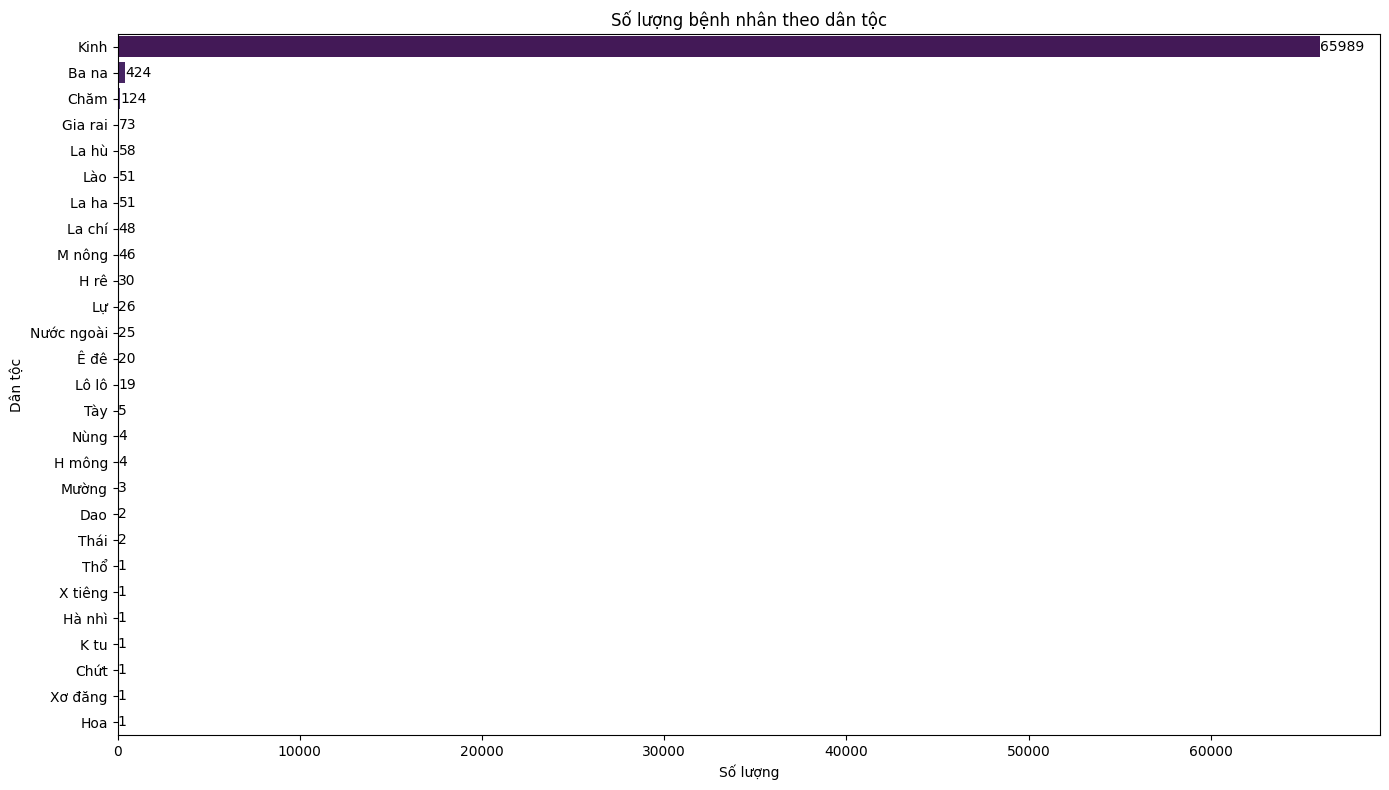

In [113]:
plt.figure(figsize=(14, 8))
sns.barplot(data=dan_toc, x='SO_LUONG', y='DANTOC', palette='viridis')

# Thêm tiêu đề và nhãn cho trục
plt.title('Số lượng bệnh nhân theo dân tộc')
plt.xlabel('Số lượng')  
plt.ylabel('Dân tộc')

# Hiển thị giá trị trên mỗi thanh
for i, v in enumerate(dan_toc['SO_LUONG']):
    plt.text(v + 5, i, str(v), va='center')  # v + 5 là để lệch sang phải cho dễ đọc

plt.tight_layout()
plt.show()

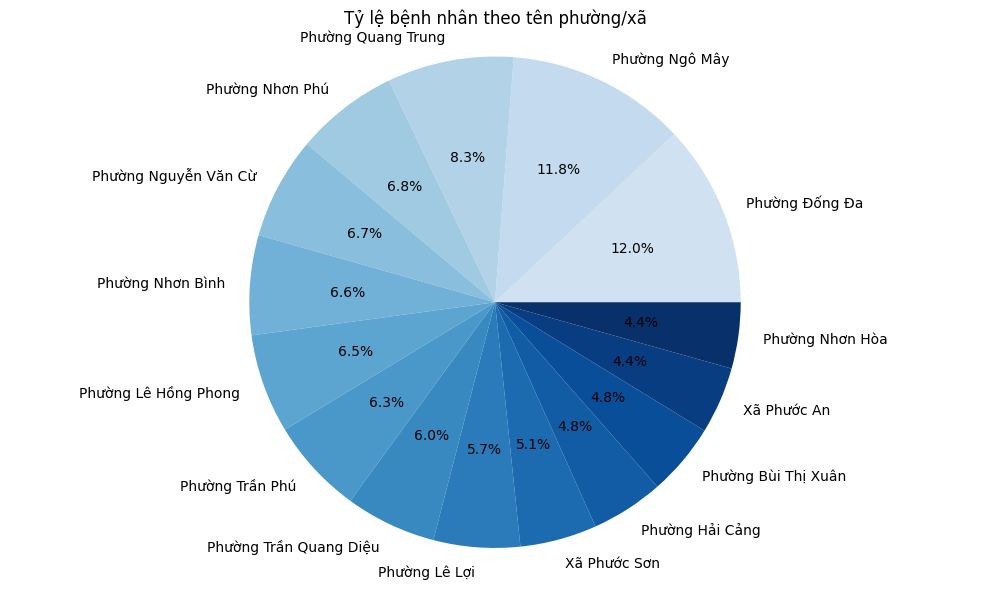

In [114]:
ten_xa = df_clean['TENPXA'].value_counts().reset_index(name = 'SO_LUONG')
ten_xa = ten_xa.sort_values(by='SO_LUONG', ascending=False).reset_index(drop=True)

# lọc lấy top 10
top_10_xa = ten_xa.head(15)
# Tạo biểu đồ tròn
plt.figure(figsize=(10, 6))
plt.pie(top_10_xa['SO_LUONG'], labels=top_10_xa['TENPXA'], autopct='%1.1f%%', colors=plt.cm.Blues(np.linspace(0.2, 1, len(top_10_xa))))

# Thêm tiêu đề
plt.title('Tỷ lệ bệnh nhân theo tên phường/xã')

# Đảm bảo biểu đồ tròn là hình tròn
plt.axis('equal')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

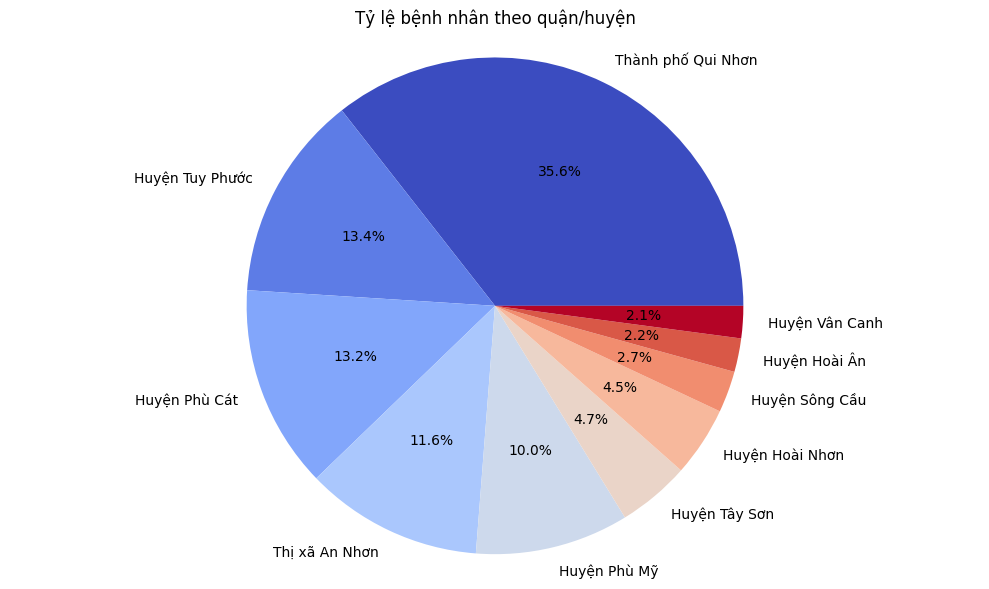

In [115]:
cu_tru = df_clean['TENQUANHUYEN'].value_counts().reset_index(name = 'SO_LUONG')
cu_tru = cu_tru.sort_values(by='SO_LUONG', ascending=False).reset_index(drop=True)
# Lọc top 10
top10_cu_tru = cu_tru.head(10)

# Tạo biểu đồ tròn
plt.figure(figsize=(10, 6))
plt.pie(top10_cu_tru['SO_LUONG'], labels=top10_cu_tru['TENQUANHUYEN'], autopct='%1.1f%%', colors=plt.cm.coolwarm(np.linspace(0, 1, len(top10_cu_tru))))

# Thêm tiêu đề
plt.title('Tỷ lệ bệnh nhân theo quận/huyện')

# Đảm bảo biểu đồ tròn là hình tròn
plt.axis('equal')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

D:\temp\ipykernel_1372\3829578558.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_tinh, y='TENTINHTHANH', x='SO_LUONG', palette='Blues_d')


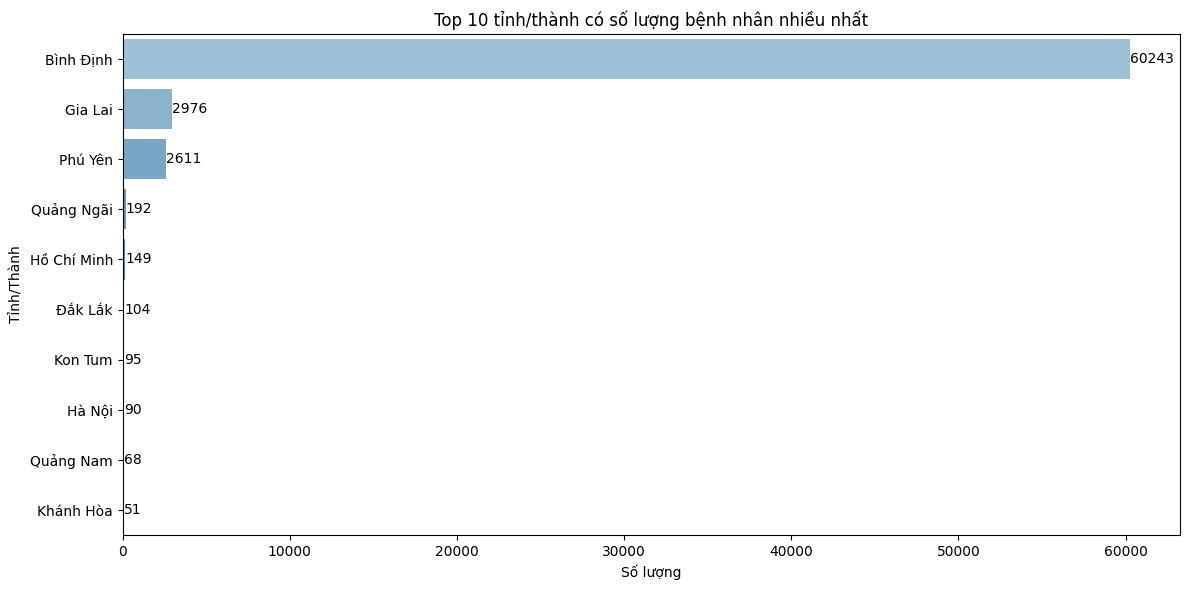

In [116]:
tinh = df_clean['TENTINHTHANH'].value_counts().reset_index(name = 'SO_LUONG')
tinh = tinh.sort_values(by='SO_LUONG', ascending=False).reset_index(drop=True)
# Lọc top 10
top10_tinh = tinh.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10_tinh, y='TENTINHTHANH', x='SO_LUONG', palette='Blues_d')

for i, value in enumerate(top10_tinh['SO_LUONG']):
    plt.text(value + 1, i, str(value), va='center')

plt.title('Top 10 tỉnh/thành có số lượng bệnh nhân nhiều nhất')
plt.xlabel('Số lượng')
plt.ylabel('Tỉnh/Thành')
plt.tight_layout()
plt.show()

In [117]:
df_clean['month-year'] = pd.to_datetime(df_clean['NGAYVAO']).dt.strftime('%Y-%m')
df_clean['NGAYVAO'] = pd.to_datetime(df_clean['NGAYVAO']).dt.date
df_clean['NGAYRA'] = pd.to_datetime(df_clean['NGAYRA']).dt.date

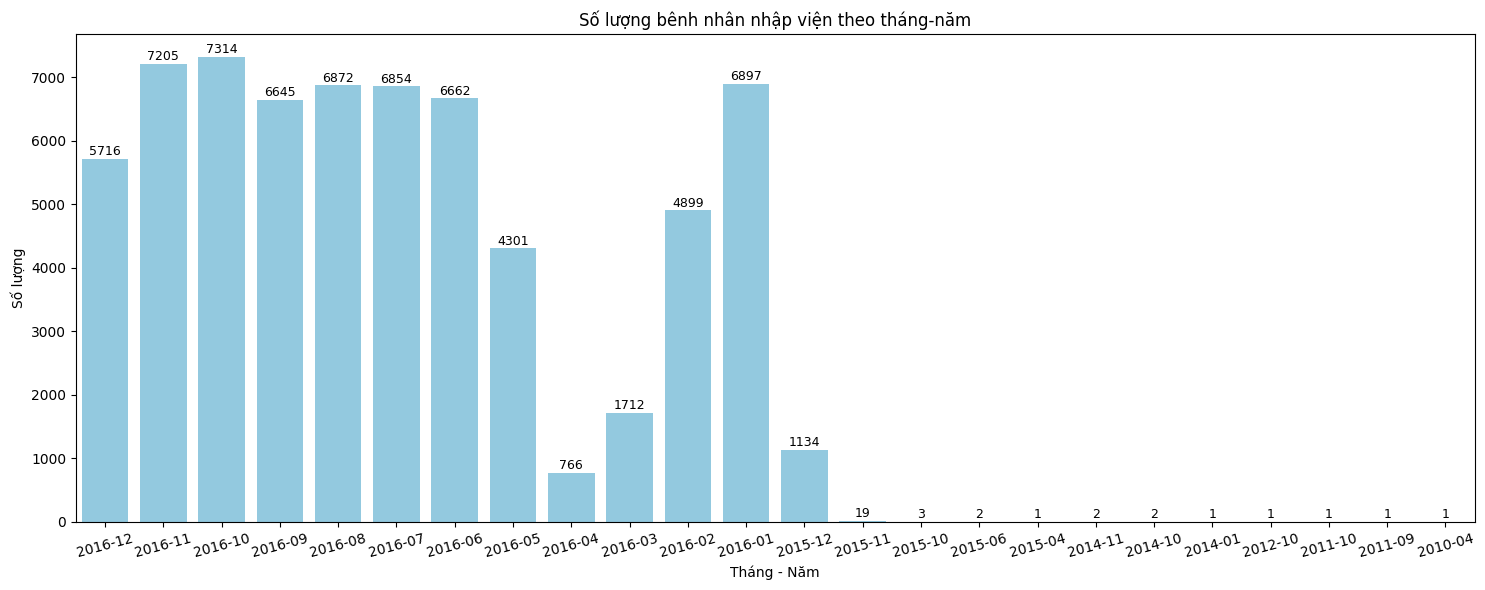

In [118]:
thang_nam = df_clean['month-year'].value_counts().reset_index(name = 'SO_LUONG')
thang_nam = thang_nam.sort_values(by='month-year', ascending=False).reset_index(drop=True)

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=thang_nam, x='month-year', y='SO_LUONG', color='skyblue')

# Thêm giá trị trên đỉnh cột
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{int(height)}', 
            ha='center', va='bottom', fontsize=9)

plt.title('Số lượng bênh nhân nhập viện theo tháng-năm')
plt.xlabel('Tháng - Năm')
plt.ylabel('Số lượng')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

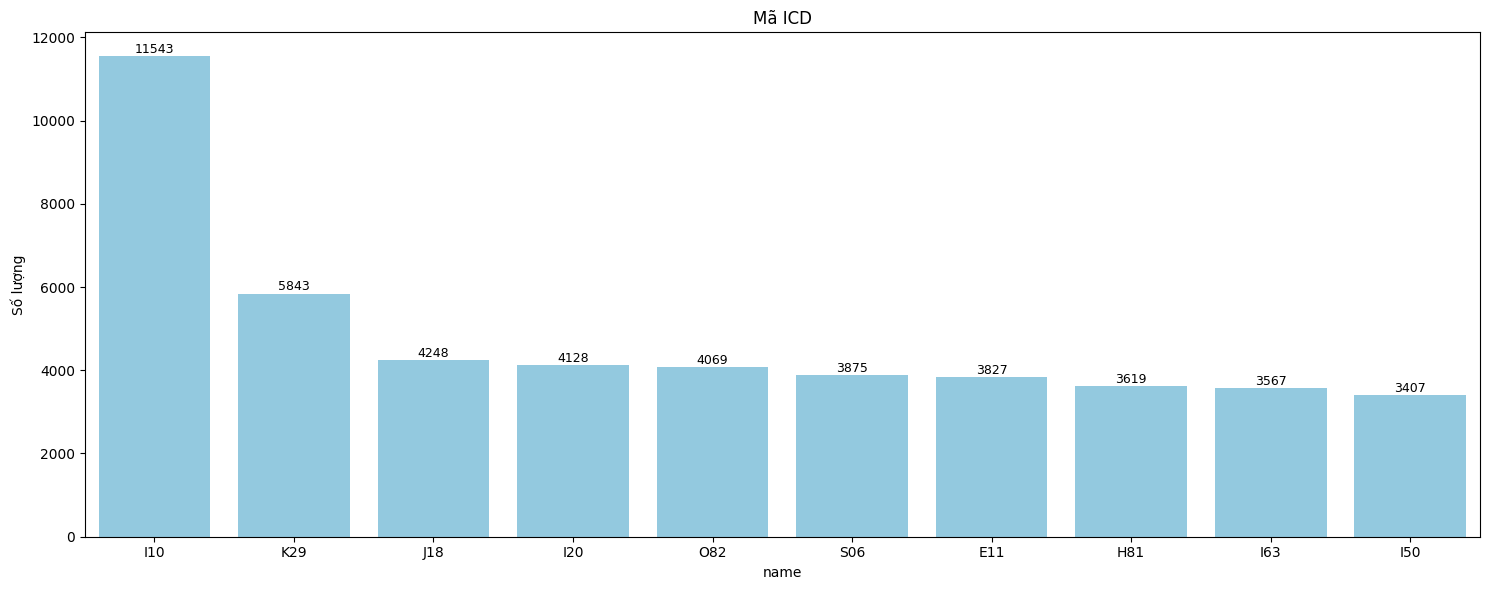

In [120]:
maicd = df['MAICD'].value_counts().reset_index(name = 'SO_LUONG')
maicd = maicd.sort_values(by='SO_LUONG', ascending=False).reset_index(drop=True)
# Lọc top 10
top10_icd = maicd.head(10)

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=top10_icd, x='MAICD', y='SO_LUONG', color='skyblue')

# Thêm giá trị trên đỉnh cột
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{int(height)}', 
            ha='center', va='bottom', fontsize=9)

plt.title('Mã ICD')
plt.xlabel('name')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

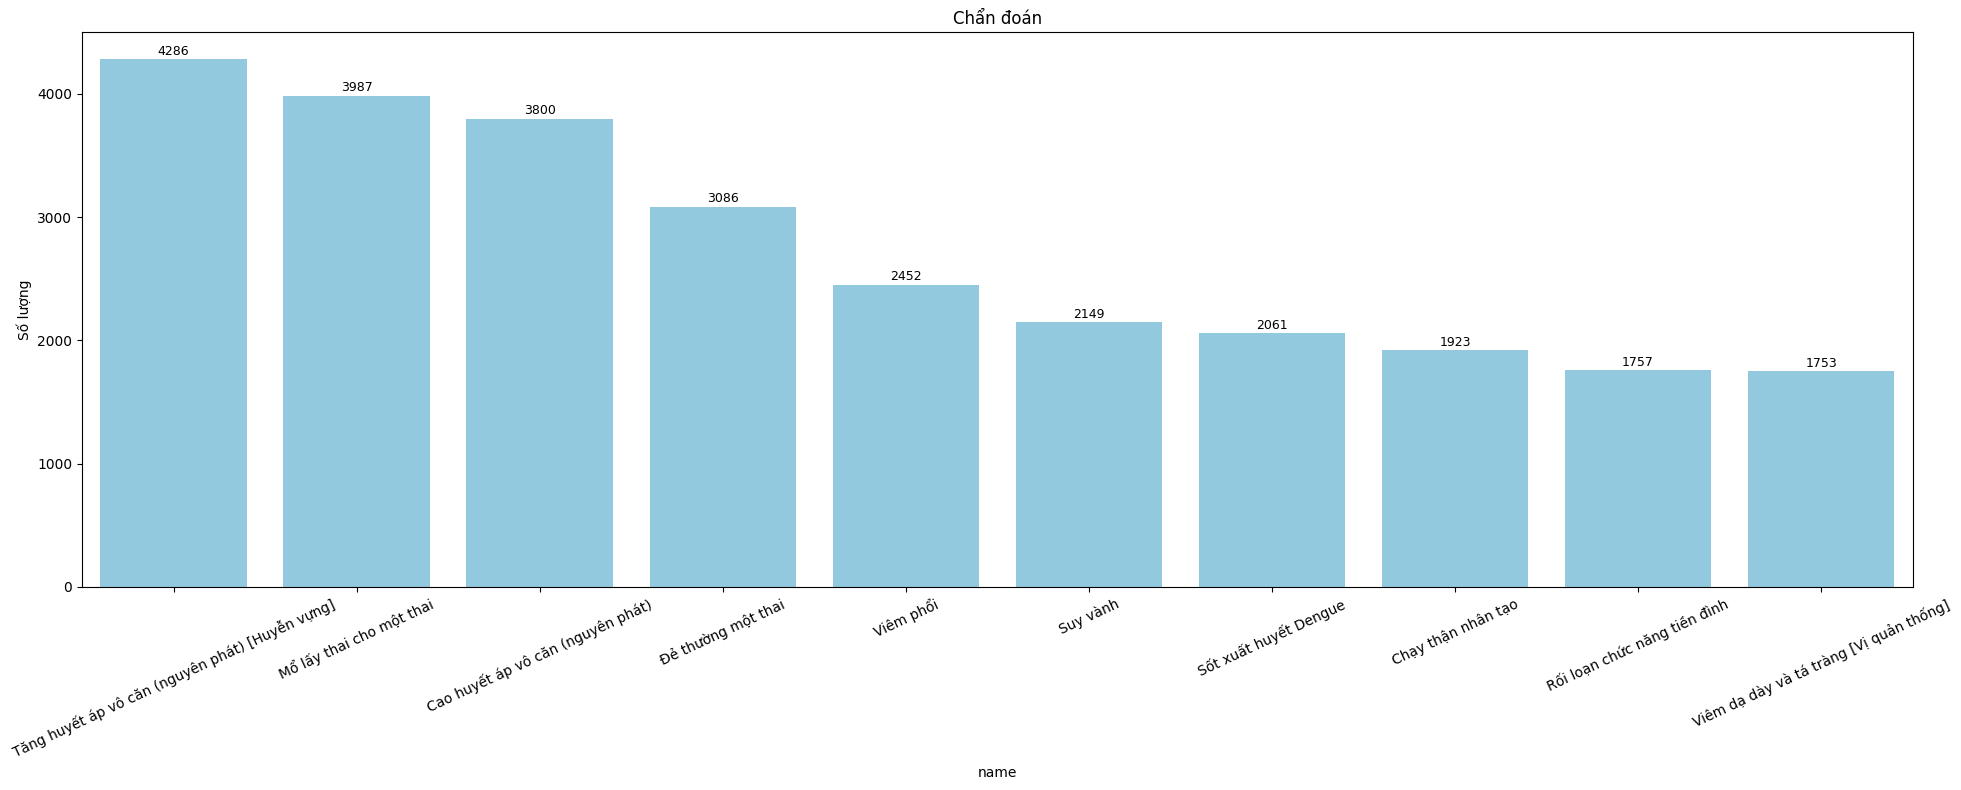

In [121]:
chandoan = df['CHANDOAN'].value_counts().reset_index(name = 'SO_LUONG')
chandoan = chandoan.sort_values(by='SO_LUONG', ascending=False).reset_index(drop=True)
# Lọc top 10
top10_chandoan = chandoan.head(10)

plt.figure(figsize=(20, 8))
ax = sns.barplot(data=top10_chandoan, x='CHANDOAN', y='SO_LUONG', color='skyblue')

# Thêm giá trị trên đỉnh cột
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f'{int(height)}', 
            ha='center', va='bottom', fontsize=9)

plt.title('Chẩn đoán')
plt.xlabel('name')
plt.ylabel('Số lượng')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

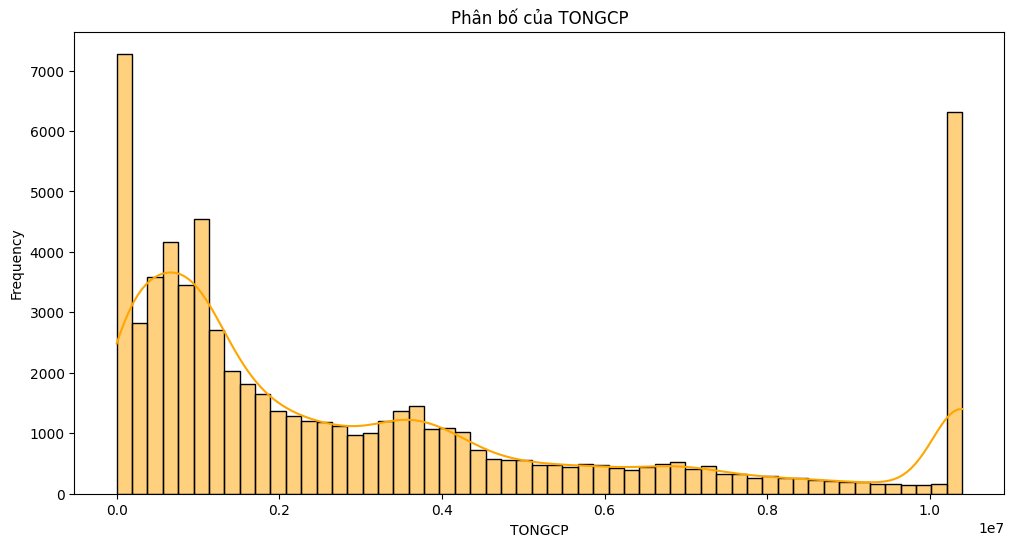

In [122]:
plt.figure(figsize=(12,6))
sns.histplot(df_clean['TONGCP'], kde=True, color='orange')
plt.xlabel('TONGCP')
plt.ylabel('Frequency')
plt.title('Phân bố của TONGCP')
plt.show()

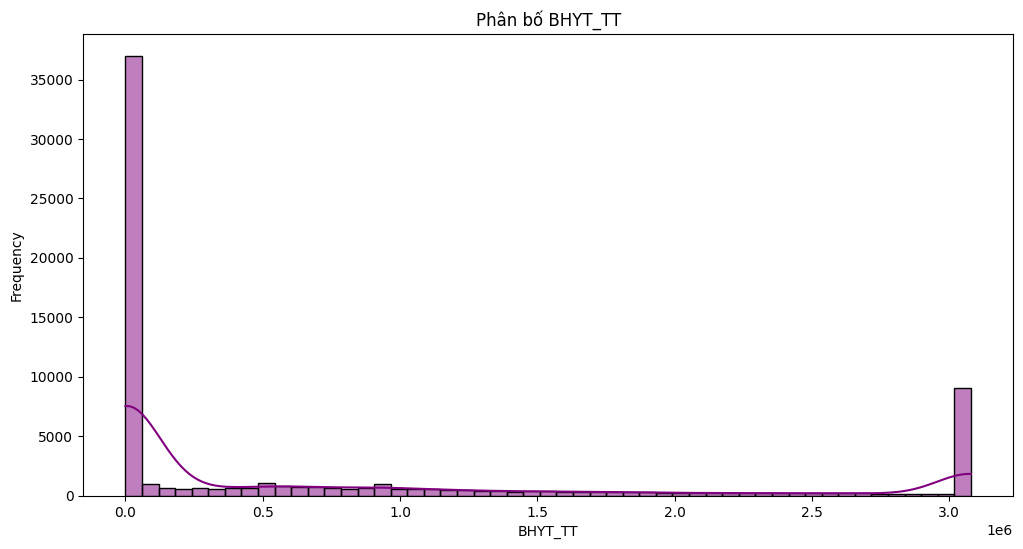

In [123]:
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['BHYT_TT'], kde=True, color='purple')
plt.xlabel('BHYT_TT')
plt.ylabel('Frequency')
plt.title('Phân bố BHYT_TT')
plt.show()

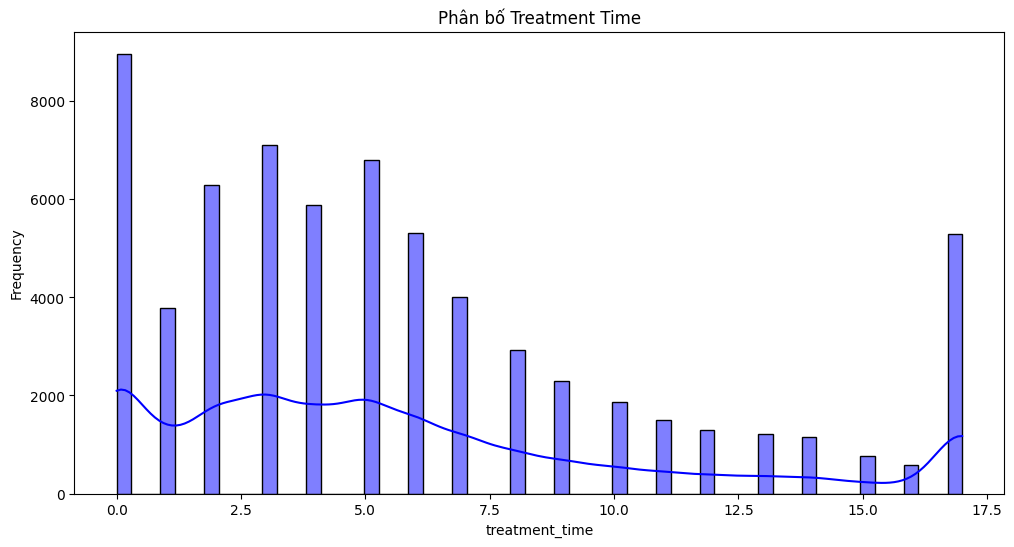

In [124]:
plt.figure(figsize=(12,6))
sns.histplot(df_clean['treatment_time'], kde=True, color='blue')
plt.xlabel('treatment_time')
plt.ylabel('Frequency')
plt.title('Phân bố Treatment Time')
plt.show()

**Nhận xét biểu đồ phân bố Treatment Time**

Biểu đồ thể hiện **phân bố thời gian điều trị (treatment_time)** với các quan sát sau:

- **Phần lớn** các ca điều trị tập trung trong khoảng **0 đến 5 đơn vị thời gian**, cho thấy đa số bệnh nhân được điều trị trong thời gian ngắn.
- **Số lượng ca điều trị giảm dần** khi thời gian điều trị tăng lên.
- Có một **điểm bất thường (outlier)** ở thời gian điều trị khoảng **17**, có thể là do lỗi dữ liệu hoặc nhóm bệnh nhân đặc biệt.

---

Đường cong màu xanh là **đường mật độ Kernel (Kernel Density Estimate - KDE)**:

- Dùng để ước lượng **phân bố xác suất liên tục** của dữ liệu.
- Cung cấp cái nhìn **mượt mà hơn** so với biểu đồ cột.
- Các **đỉnh của đường KDE** thể hiện những khoảng giá trị mà dữ liệu tập trung nhiều nhất.

# Lựa chọn / Trích xuất đặc trưng.

In [42]:
# Khởi tạo và train mô hình trên tập huấn luyện
model = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Tính độ quan trọng đặc trưng trên mô hình đã train
importances = model.feature_importances_

# Tạo DataFrame để dễ quan sát
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sắp xếp theo độ quan trọng giảm dần
feature_scores = feature_scores.sort_values(by='Importance', ascending=False)

print(feature_scores)

          Feature  Importance
6          TONGCP      0.1991
9             AGE      0.1714
5        CHANDOAN      0.1703
1          TENPXA      0.1596
8  treatment_time      0.0904
7         BHYT_TT      0.0679
4           MAICD      0.0653
2    TENQUANHUYEN      0.0634
3    TENTINHTHANH      0.0103
0          DANTOC      0.0023


In [43]:
# Chọn top-k đặc trưng quan trọng
k = 8
top_features = feature_scores.head(k)['Feature'].tolist()
x_selected = X_train[top_features]

In [44]:
x_selected.head()

,TONGCP,AGE,CHANDOAN,TENPXA,treatment_time,BHYT_TT,MAICD,TENQUANHUYEN
78968,1015123.0000,24,18734,113,2,0.0000,1709,275
9812,229163.0000,2,12671,188,5,229163.0000,1055,275
133794,2472217.6862,86,10574,128,12,2472217.6863,1877,275
95678,7691354.3705,22,3248,100,13,0.0000,2039,275
49504,10398252.9213,66,13220,186,17,3078512.4625,904,275


# XÂY DỰNG MÔ HÌNH CÂY QUYẾT ĐỊNH (DECISION TREE).

In [45]:
# Dữ liệu đã chọn theo k đặc trưng
X_train_topk = X_train[top_features]
X_test_topk = X_test[top_features]

In [46]:
print(f"Kích thước tập huấn luyện: {X_train_topk.shape[0]}")
print(f"Kích thước tập kiểm tra: {X_test_topk.shape[0]}")

Kích thước tập huấn luyện: 125888
Kích thước tập kiểm tra: 31472


# KHỞI TẠO MÔ HÌNH

In [47]:
# khởi tạo mô hình Decision Tree
model_topk = DecisionTreeClassifier(criterion='entropy', class_weight='balanced', random_state=42)

# HUẤN LUYỆN MÔ HÌNH.

In [48]:
model_topk.fit(X_train_topk, y_train_encoded)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

# ĐÁNH GIÁ MÔ HÌNH

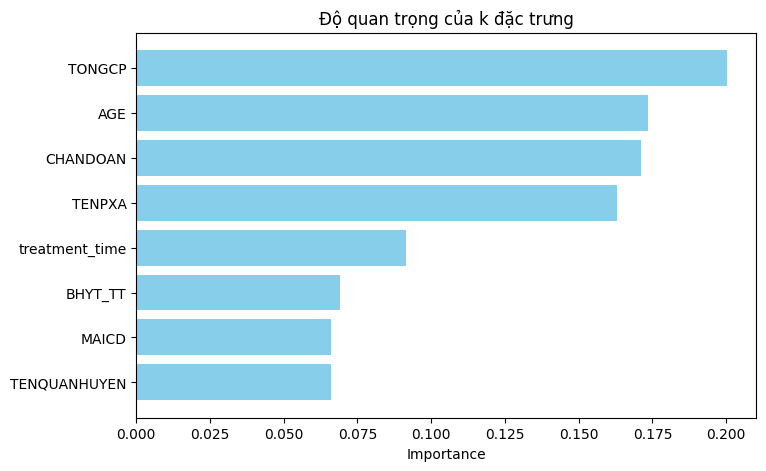

In [49]:
# Lấy độ quan trọng đặc trưng từ model_topk
importances_topk = model_topk.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(top_features, importances_topk, color='skyblue')
plt.xlabel('Importance')
plt.title('Độ quan trọng của k đặc trưng')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Dự đoán trên tập test với mô hình huấn luyện k đặc trưng
y_pred_topk = model_topk.predict(X_test_topk)

# In classification report
print(classification_report(y_test_encoded, y_pred_topk))

# In Accuracy (dạng phần trăm, 2 chữ số thập phân)
acc = accuracy_score(y_test_encoded, y_pred_topk)
print("\nAccuracy: {:.0%}".format(acc))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      9838
           1       0.68      0.73      0.70      8291
           2       0.73      0.72      0.72      9818
           3       0.66      0.66      0.66      3525

    accuracy                           0.71     31472
   macro avg       0.70      0.70      0.70     31472
weighted avg       0.71      0.71      0.71     31472


Accuracy: 71%


In [54]:
# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test_encoded, y_pred_topk)
print(f"\nMa trận nhầm lẫn: \n{cm}")


Ma trận nhầm lẫn: 
[[6860 1151 1293  534]
 [ 792 6043 1082  374]
 [1160 1302 7055  301]
 [ 524  408  267 2326]]


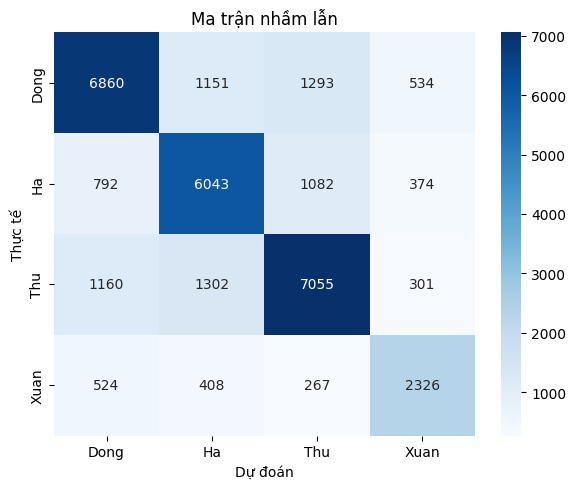

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Nhãn theo thứ tự mã hóa
labels = ["Dong", "Ha", "Thu", "Xuan"]

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test_encoded, y_pred_topk)

# Vẽ heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("Ma trận nhầm lẫn")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.tight_layout()
plt.show()

In [52]:
# Precision, Recall, F1-score trung bình (macro)
precision = precision_score(y_test_encoded, y_pred_topk, average='macro')
recall = recall_score(y_test_encoded, y_pred_topk, average='macro')
f1 = f1_score(y_test_encoded, y_pred_topk, average='macro')

print("Precision (macro): {:.0%}".format(precision))
print("Recall (macro): {:.0%}".format(recall))
print("F1-score (macro): {:.0%}".format(f1))

Precision (macro): 70%
Recall (macro): 70%
F1-score (macro): 70%


**Nhận xét:**


**Nhận xét kết quả đánh giá mô hình**

- **Độ chính xác tổng thể (Accuracy):** 70.97% – mức chấp nhận được, nhưng vẫn cần 0cải thiện.
- **Precision, Recall, F1-score:**
  - Nhìn chung dao động quanh 0.70, chứng tỏ mô hình khá cân bằng giữa các lớp.
  - Lớp 1 và lớp 3 có F1 thấp nhất (0.70 và 0.65) → mô hình gặp khó khăn với hai lớp này.
- **Macro avg vs. Weighted avg:** tương đương (~0.70) → dữ liệu phân bố tương đối đều, không quá mất cân bằng.
- **Ma trận nhầm lẫn:**
  - Lớp 0 và 2 bị nhầm nhiều với nhau → có thể do đặc trưng tương đồng.
  - Lớp 3 có số lượng mẫu ít nhất (3525), dễ bị mô hình đánh giá sai → cần cân nhắc thêm dữ liệu hoặc kỹ thuật xử lý mất cân bằng.

**→ Kết luận:** Mô hình hoạt động khá ổn với độ chính xác ~71%. Tuy nhiên, cần cải thiện phân biệt giữa các lớp gần nhau và chú ý đến lớp ít dữ liệu (lớp 3).


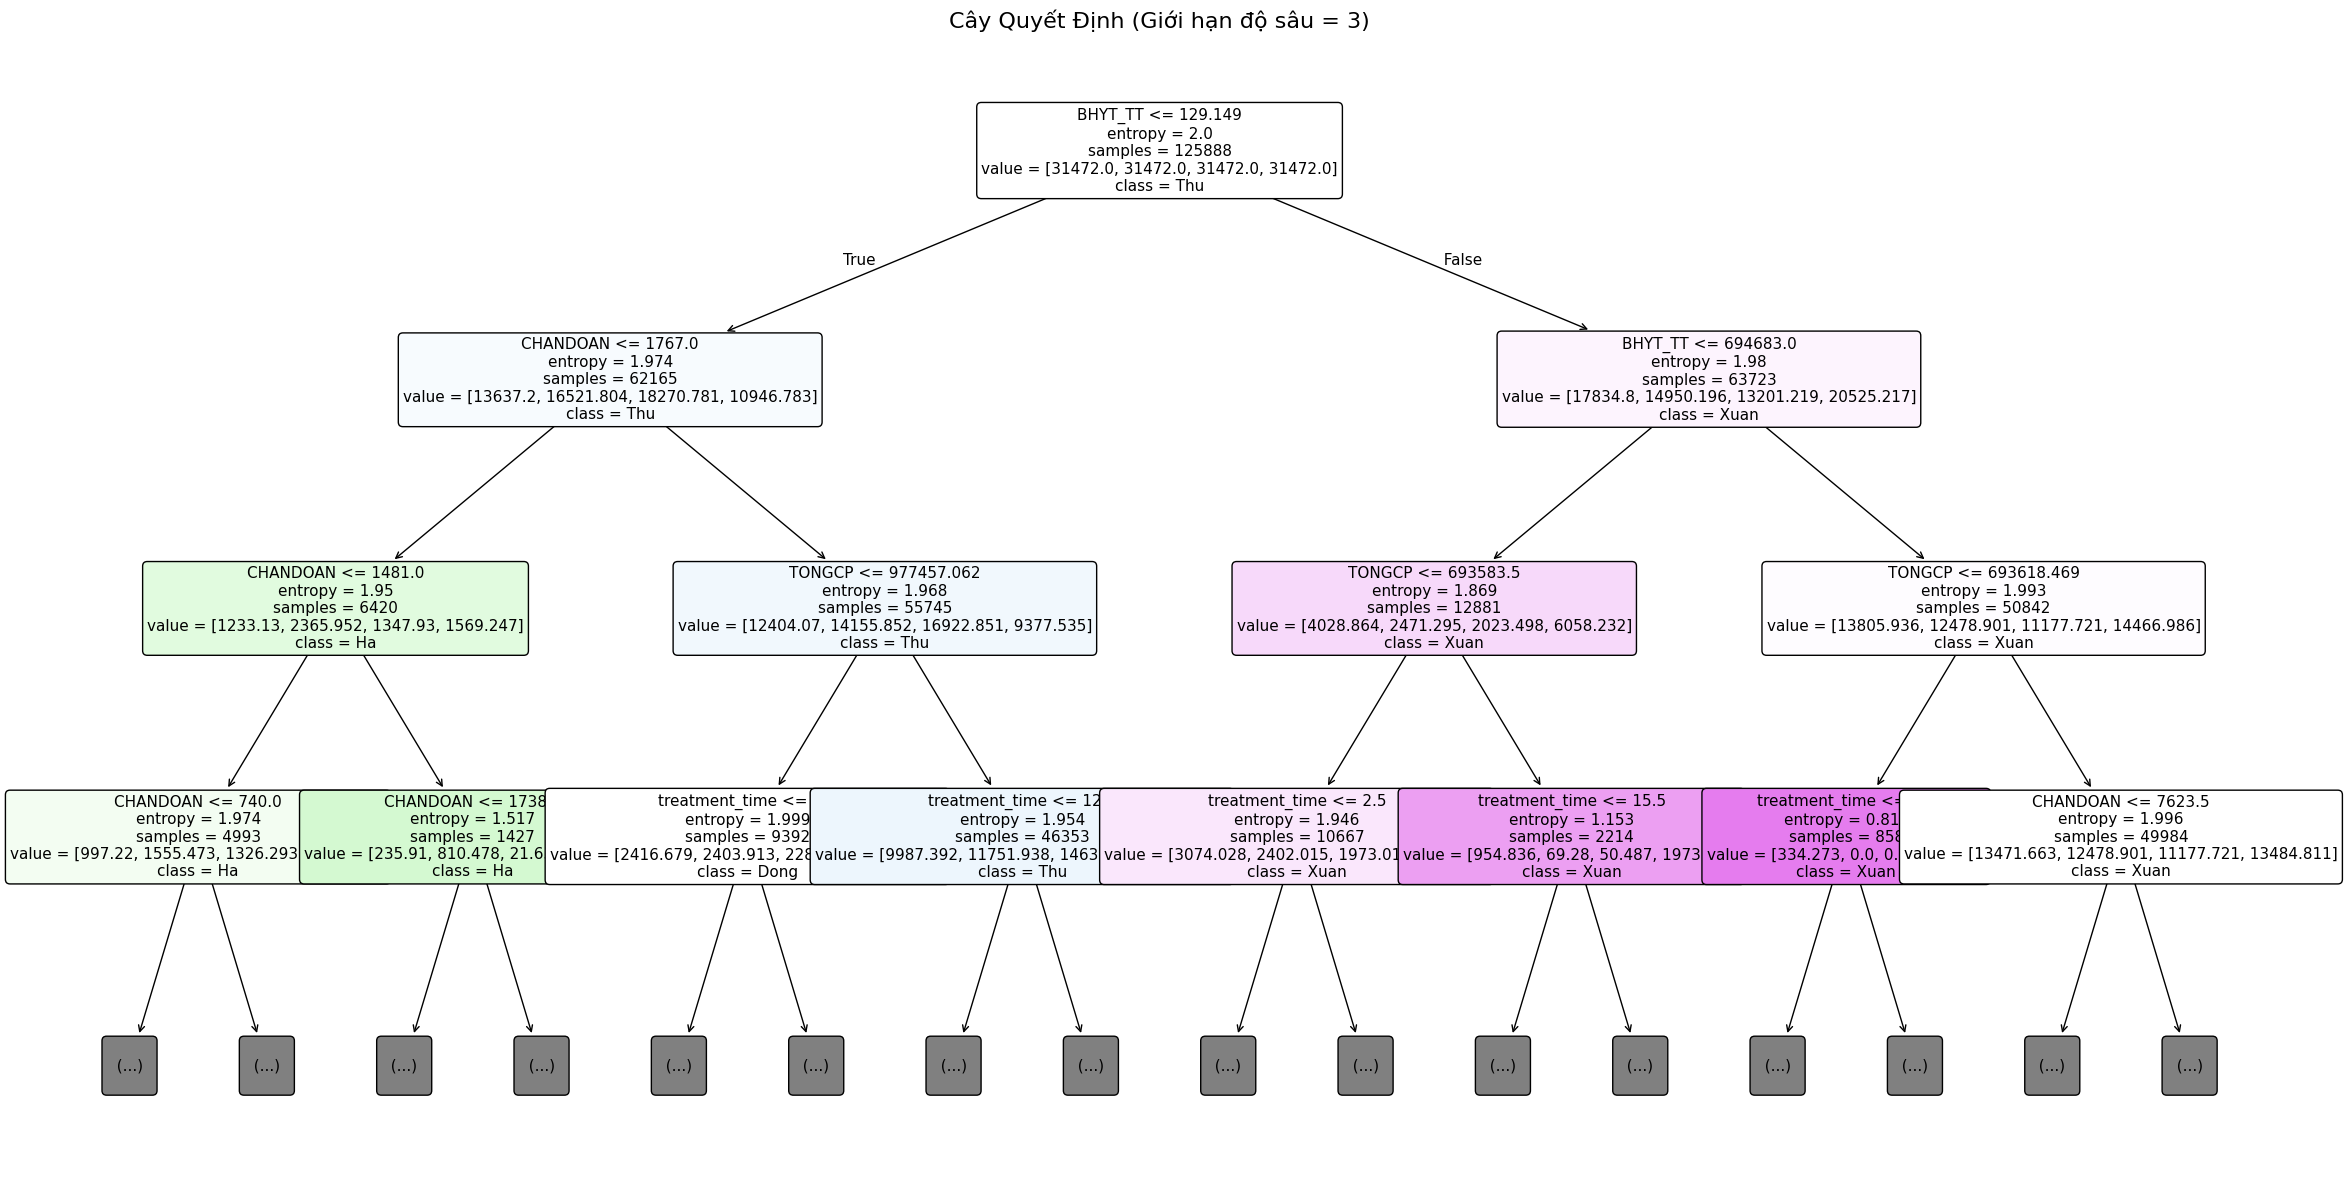

In [161]:
plt.figure(figsize=(24, 12))  

plot_tree(
    model_topk,                                
    feature_names=top_features,                
    class_names=le_target.classes_,            
    filled=True,                               
    rounded=True,                              
    fontsize=11,                               
    max_depth=3,                               
    impurity=True,      # hiển thị entropy
    #proportion=True     # hiển thị tỷ lệ mẫu tại mỗi nút
)

plt.title("Cây Quyết Định (Giới hạn độ sâu = 3)", fontsize=16)
plt.tight_layout()
plt.show()

**Nhận xét cây quyết định (Decision Tree)**

- **Thuộc tính phân chia chính:** `CHANDOAN`, `TONGCP`, `treatment_time` – cho thấy đây là các đặc trưng quan trọng cao ảnh hưởng đến phân loại.
- **Entropy giảm dần hợp lý:** Các nhánh con có entropy thấp hơn thể hiện mô hình đang phân chia dữ liệu khá hiệu quả.
- **Số lượng mẫu lớn ở nút gốc (125888)** được chia hợp lý thành các lớp ở các nút con, cho thấy mô hình học được xu hướng phân loại theo đặc trưng đầu vào.
- **Các nút lá có phân bố nhãn khá rõ ràng:** Một số nút có phân bố thiên lệch mạnh về một lớp, ví dụ: `value = [992, 2079, 0, 886]` → mô hình phân biệt tốt.
- **Một số nhánh vẫn còn nhiễu (entropy cao):** Ví dụ: nhánh `treatment_time <= 2.5`, entropy = 1.941 → mô hình khó phân loại chính xác trong nhóm này.
- **Lớp “Ha” có vẻ khó phân biệt hơn các lớp khác**, vì thường xuất hiện trộn lẫn với các lớp còn lại trong nhiều nhánh.

**→ Kết luận:** Cây quyết định học được quy luật phân loại khá tốt, đặc biệt với các thuộc tính `CHANDOAN` và `TONGCP`. Tuy nhiên, một số nhánh vẫn còn nhiễu và cần xem xét thêm đặc trưng hoặc tinh chỉnh mô hình để cải thiện độ chính xác.


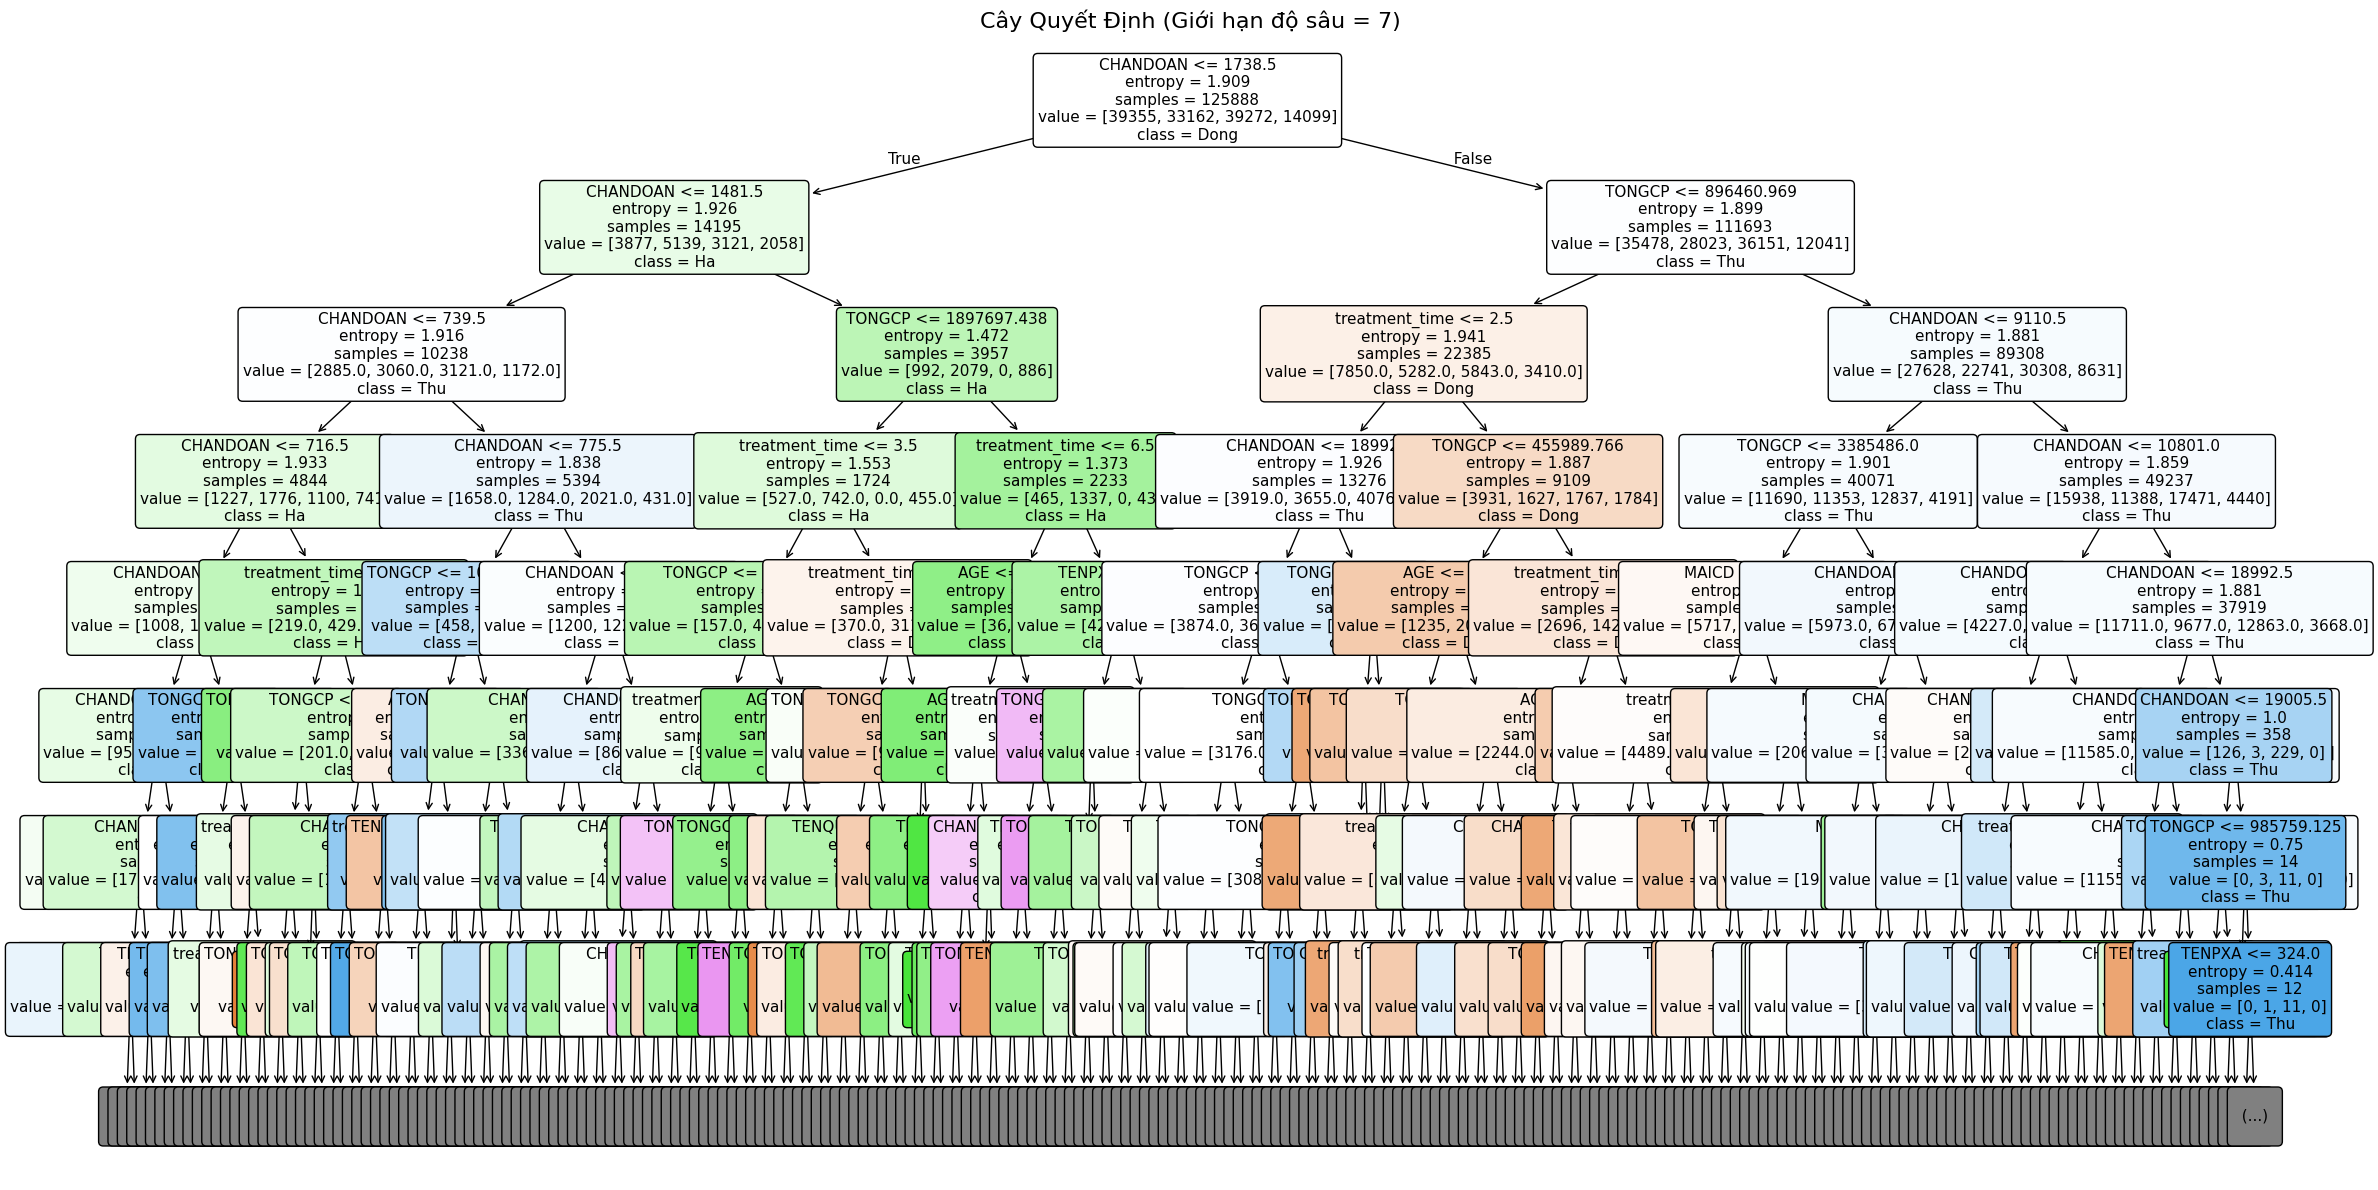

In [ ]:
plt.figure(figsize=(24, 12))  

plot_tree(
    model_topk,                                
    feature_names=top_features,                
    class_names=le_target.classes_,            
    filled=True,                               
    rounded=True,                              
    fontsize=11,                               
    max_depth=7,                            
    impurity=True,      # hiển thị entropy
    #proportion=True    # hiển thị tỷ lệ mẫu tại mỗi nút
)

plt.title("Cây Quyết Định (Giới hạn độ sâu = 7)", fontsize=16)
plt.tight_layout()
plt.show()

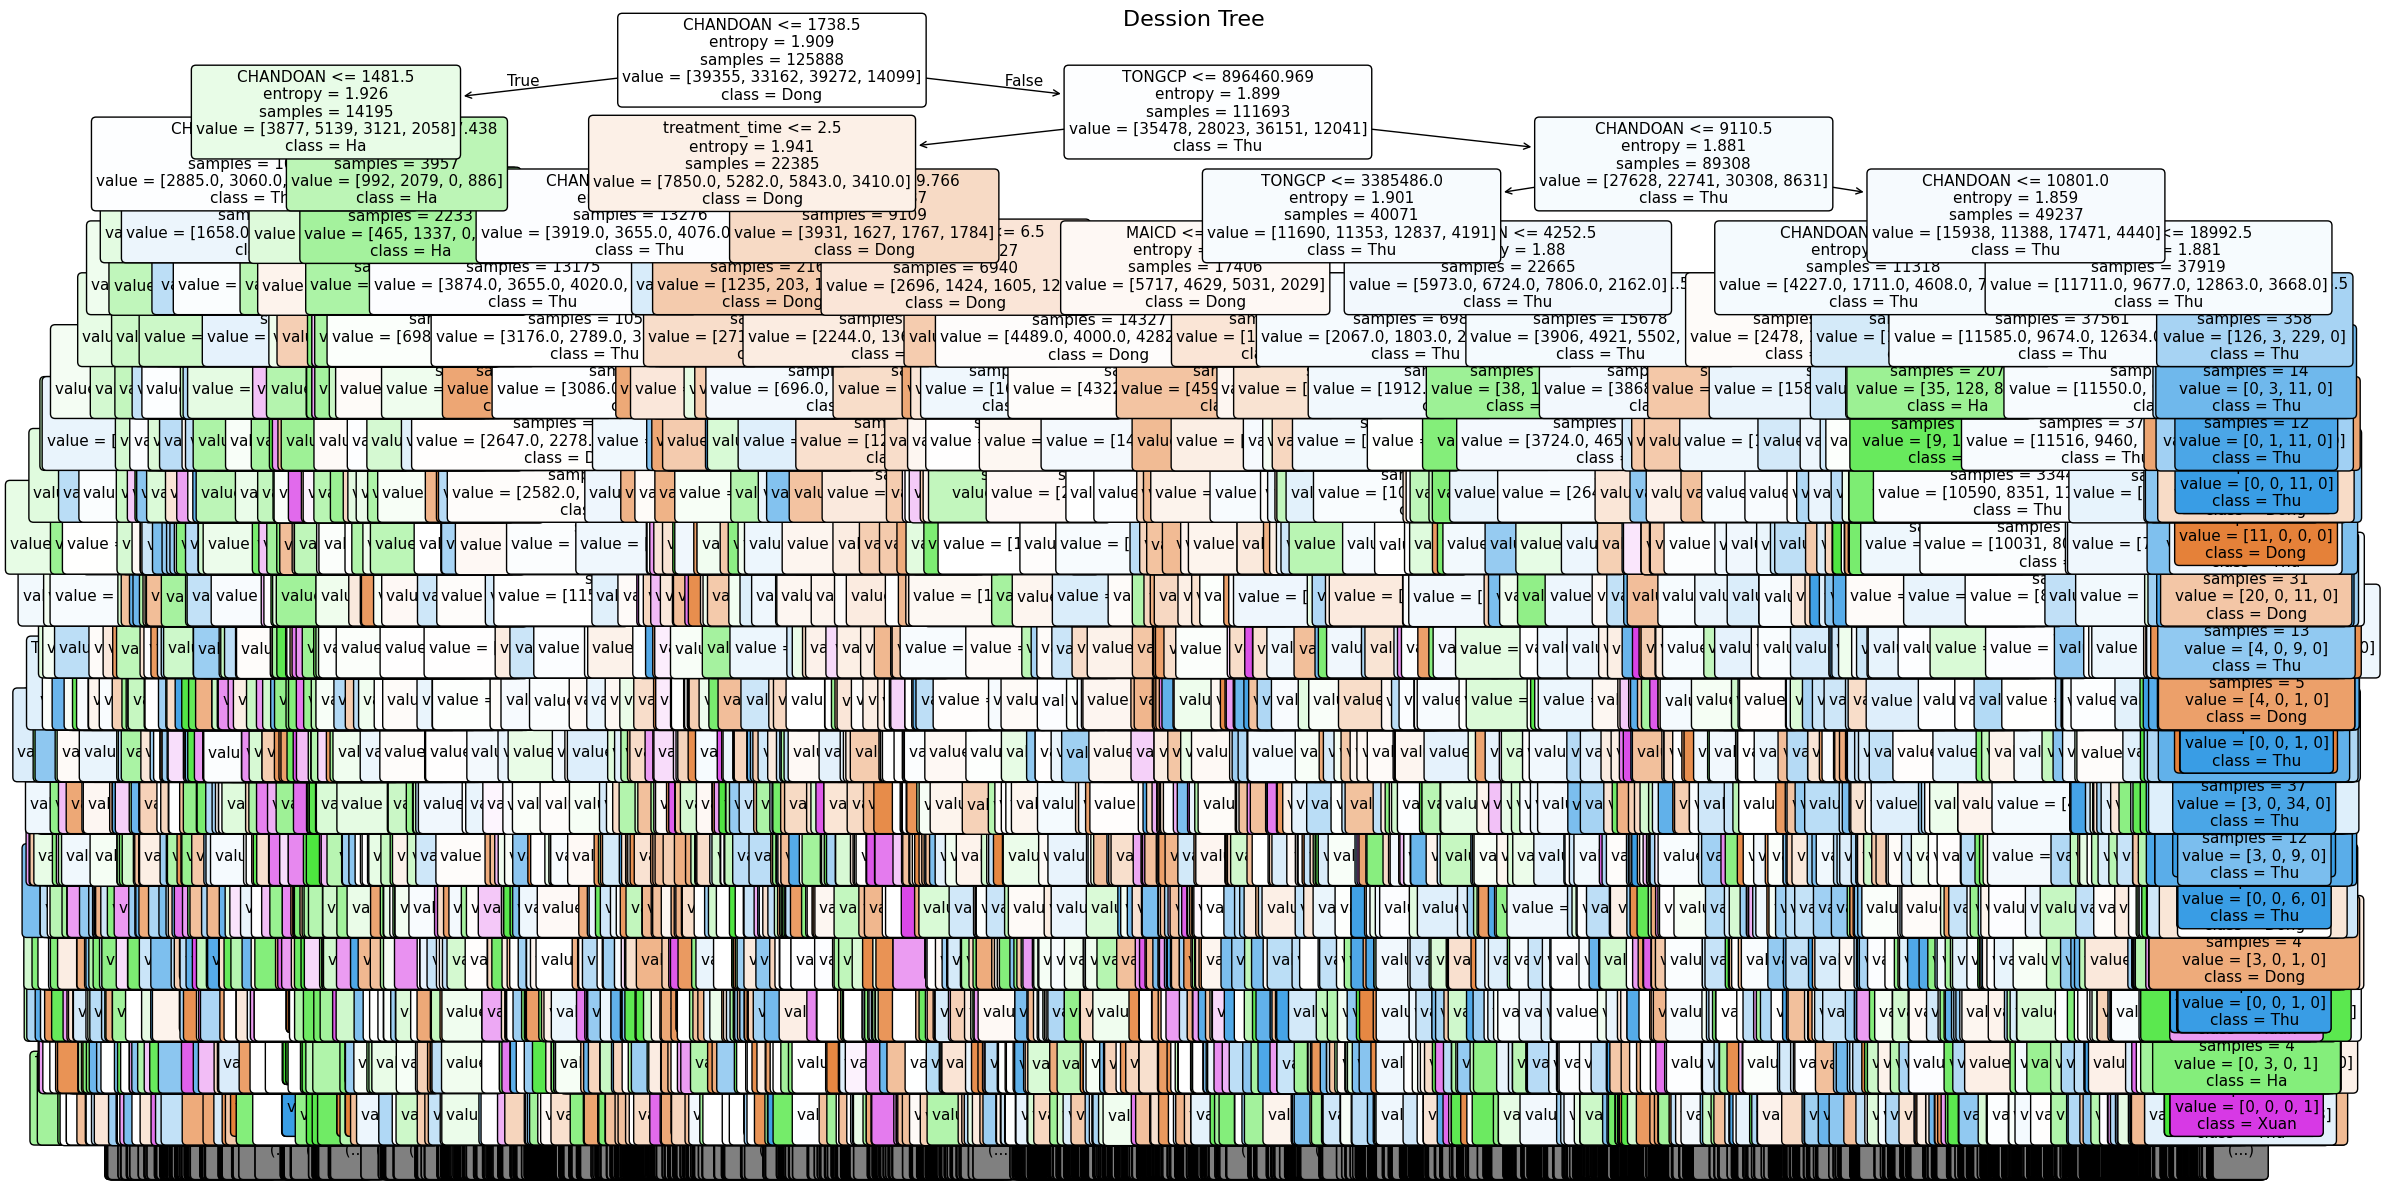

In [ ]:
plt.figure(figsize=(24, 12))  

plot_tree(
    model_topk,                                
    feature_names=top_features,                
    class_names=le_target.classes_,            
    filled=True,                               
    rounded=True,                              
    fontsize=11,                               
    max_depth=20,                          
    impurity=True,       # hiển thị entropy
    #proportion=True     # hiển thị tỷ lệ mẫu tại mỗi nút
)

plt.title("Dession Tree", fontsize=16)
plt.tight_layout()
plt.show()